## Visualize on all Captain Crunch bug reports

For each bug, we plot out:
- **Forecast plot**: step forecast result and 1 month future forecast with ARMA + FFT models using open window and sliding window respectively.
- **CR/TR plot**: capacity remaning and time remaining plots as computed in VRops.

In [1]:
import json
import argparse
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
from scipy import stats
from pandas import Series
import matplotlib as mpl
%matplotlib inline

In [2]:
def plot_forecast(filename):
    forecast = pd.read_csv(filename, index_col=0, squeeze=True, parse_dates=True)
    actual = forecast['actual']
    has_long = False
    has_short = False
    if "m1_long_predict" in forecast:
        has_long = True
    if "m1_short_predict" in forecast:
        has_short = True

    column_per_model = 9 if has_long and has_short else 6
    num_models = int((forecast.shape[1] - 1) / column_per_model)
    fig = plt.figure(figsize=(20,4 * (num_models+1)))
    axs = [fig.add_subplot(num_models+1,1,i+1) for i in range(num_models+1)]
    axs[0].plot(actual)
    axs[0].set_title("original time series", fontsize=16)

    for i in range(1, num_models+1):
        if has_long:
            l_predict = forecast['m{0}_long_predict'.format(i)]
            l_upper = forecast['m{0}_long_upper'.format(i)]
            l_lower = forecast['m{0}_long_lower'.format(i)]
        if has_short:
            s_predict = forecast['m{0}_short_predict'.format(i)]
            s_upper = forecast['m{0}_short_upper'.format(i)]
            s_lower = forecast['m{0}_short_lower'.format(i)]
        f_predict = forecast['m{0}_future_predict'.format(i)]
        f_upper = forecast['m{0}_future_upper'.format(i)]
        f_lower = forecast['m{0}_future_lower'.format(i)]

        
        metric_length = len(forecast)
        model_name = "ARMA + FFT"
        sample_strategy = "OPEN WINDOW" if i == 1 else "SLIDING WINDOW"
        axs[i].plot(actual, 'b.', label='ground truth, metric_length={0}'.format(metric_length), linewidth=2)
        if has_long:
            axs[i].plot(l_predict, 'r', linewidth=2,
                label='long-term forecast')
            axs[i].fill_between(forecast.index,
                            l_upper,
                            l_lower, color='r', alpha=.2)
        if has_short:
            axs[i].plot(s_predict, 'g', linewidth=2,
                label='short-term forecast')
            axs[i].fill_between(forecast.index,
                            s_upper,
                            s_lower, color='g', alpha=.2)

        axs[i].plot(f_predict, 'm', linewidth=2,
            label='future forecast for 30 days')
        axs[i].fill_between(forecast.index,
                        f_upper,
                        f_lower, color='m', alpha=.2)
        axs[i].legend(loc='lower right', fontsize=14)
        axs[i].set_title("Models={0}, Sample={1}".format(model_name, sample_strategy), fontsize=16)

    outputPath = os.path.splitext(filename)[0] + ".png"
    fig.tight_layout()
    plt.show()

In [3]:
def plot_CR_TR(filename):
    table = pd.read_csv(filename, index_col=0, squeeze=True, parse_dates=True)
    length = table.shape[0]
    fig = plt.figure(figsize=(15,12))
    num_fig = 4
    ax1 = fig.add_subplot(num_fig,1,1)
    ax1.plot(table["Metric"])
    ax1.plot(table['Capacity'])
    ax1.set_title("Demand/Capacity", fontsize=20)
    ax1.tick_params(labelsize=16)

    ax2 = fig.add_subplot(num_fig,1,2)
    ax2.plot(table["TR"])
    ax2.set_title("Time Remaining(Days)", fontsize=20)
    ax2.plot(Series(data=np.zeros(length), index=table.index), 'r--')
    ax2.tick_params(labelsize=16)

    ax3 = fig.add_subplot(num_fig,1,3)
    ax3.plot(table["CR"])
    ax3.plot(table['Capacity'])
    ax3.set_title("Capacity Remaining", fontsize=20)
    ax3.tick_params(labelsize=16)

    ax4 = fig.add_subplot(num_fig,1,4)
    ax4.plot(table["beta"][100:])
    ax4.plot(Series(data=np.zeros(length), index=table.index), 'r--')
    ax4.set_title("Beta", fontsize=20)
    ax4.tick_params(labelsize=16)

    #ax5 = fig.add_subplot(num_fig,1,5)
    #ax5.plot(table["beta_std"][100:])
    #ax5.plot(Series(data=np.zeros(length), index=table.index), 'r--')
    #ax5.set_title("Beta_std", fontsize=20)
    #ax5.tick_params(labelsize=16)

    fig.tight_layout()
    plt.show()
    #plt.savefig("data/TRBugs/report/bug_{}_crtr.png".format(bug))

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1945221


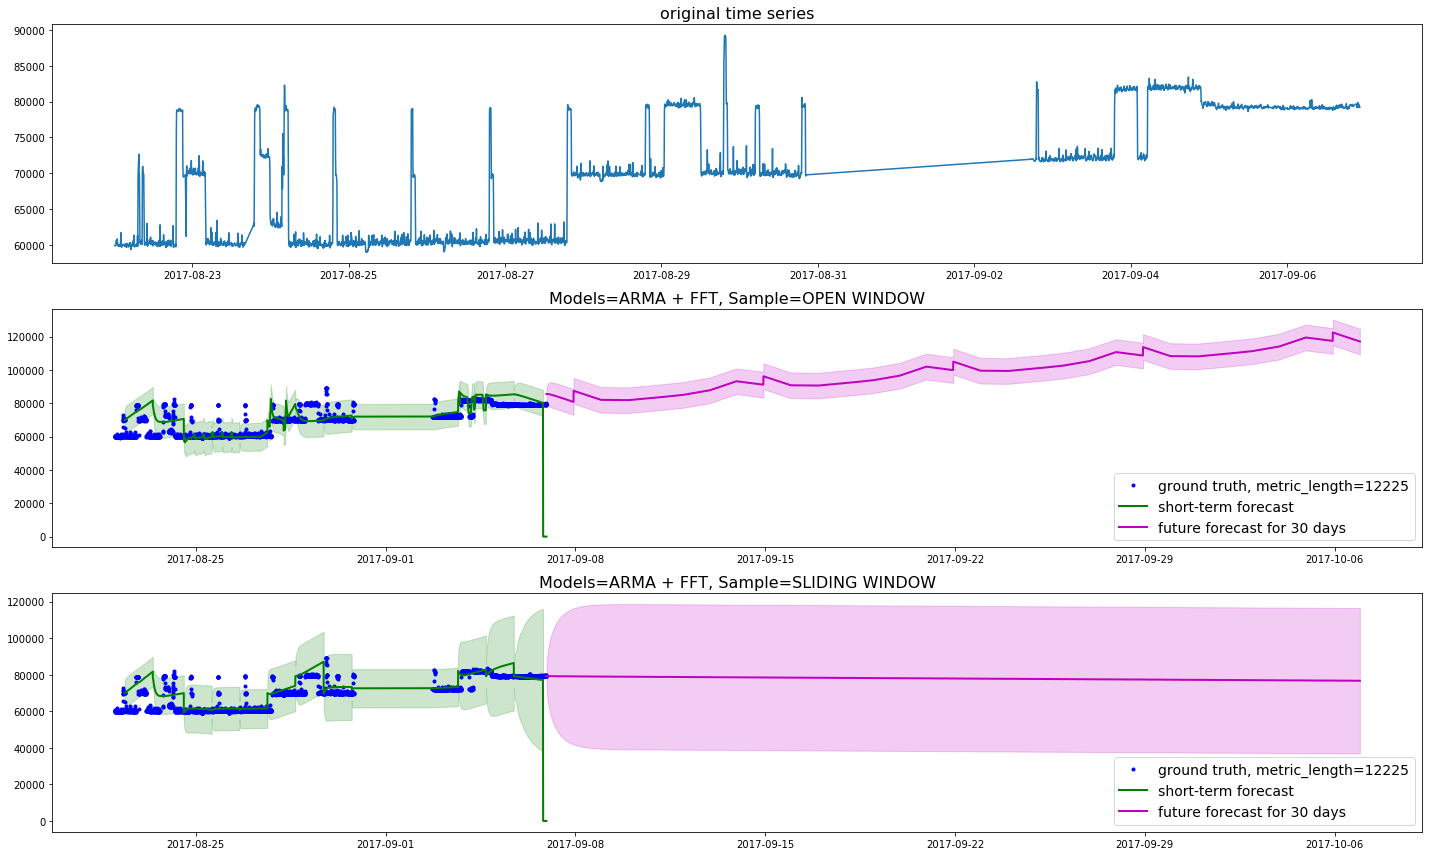

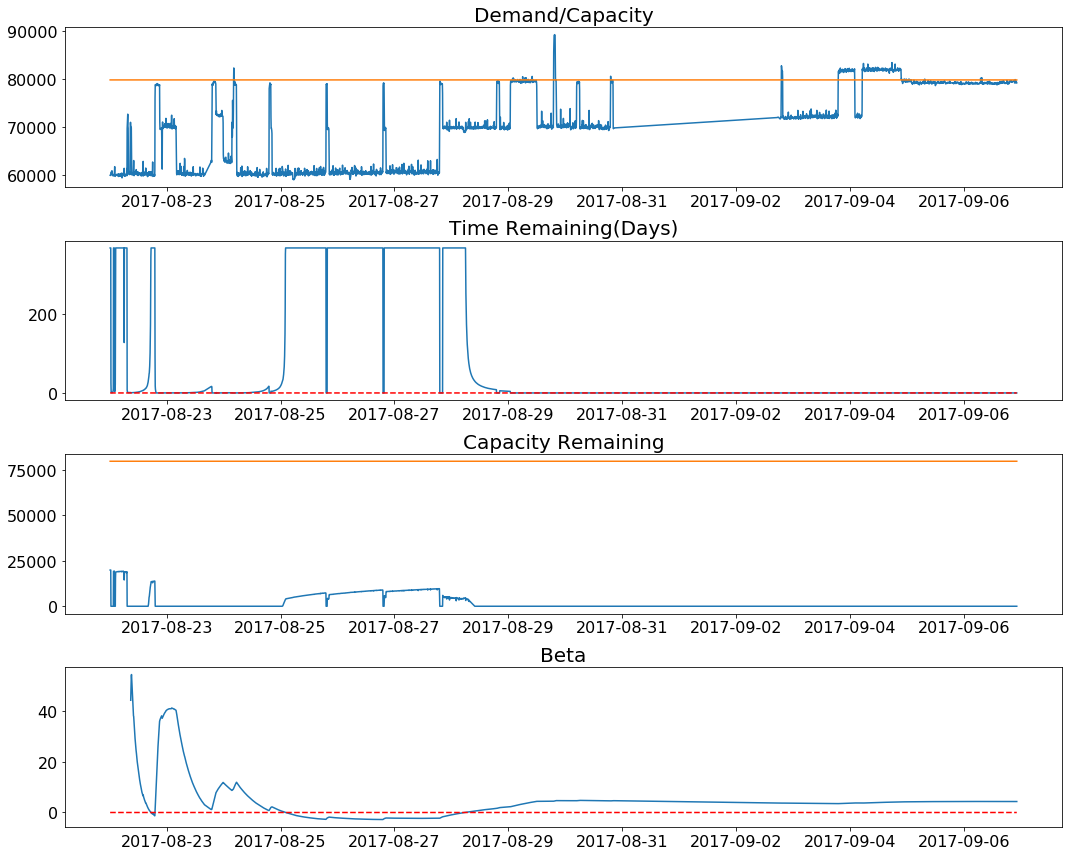

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1950721


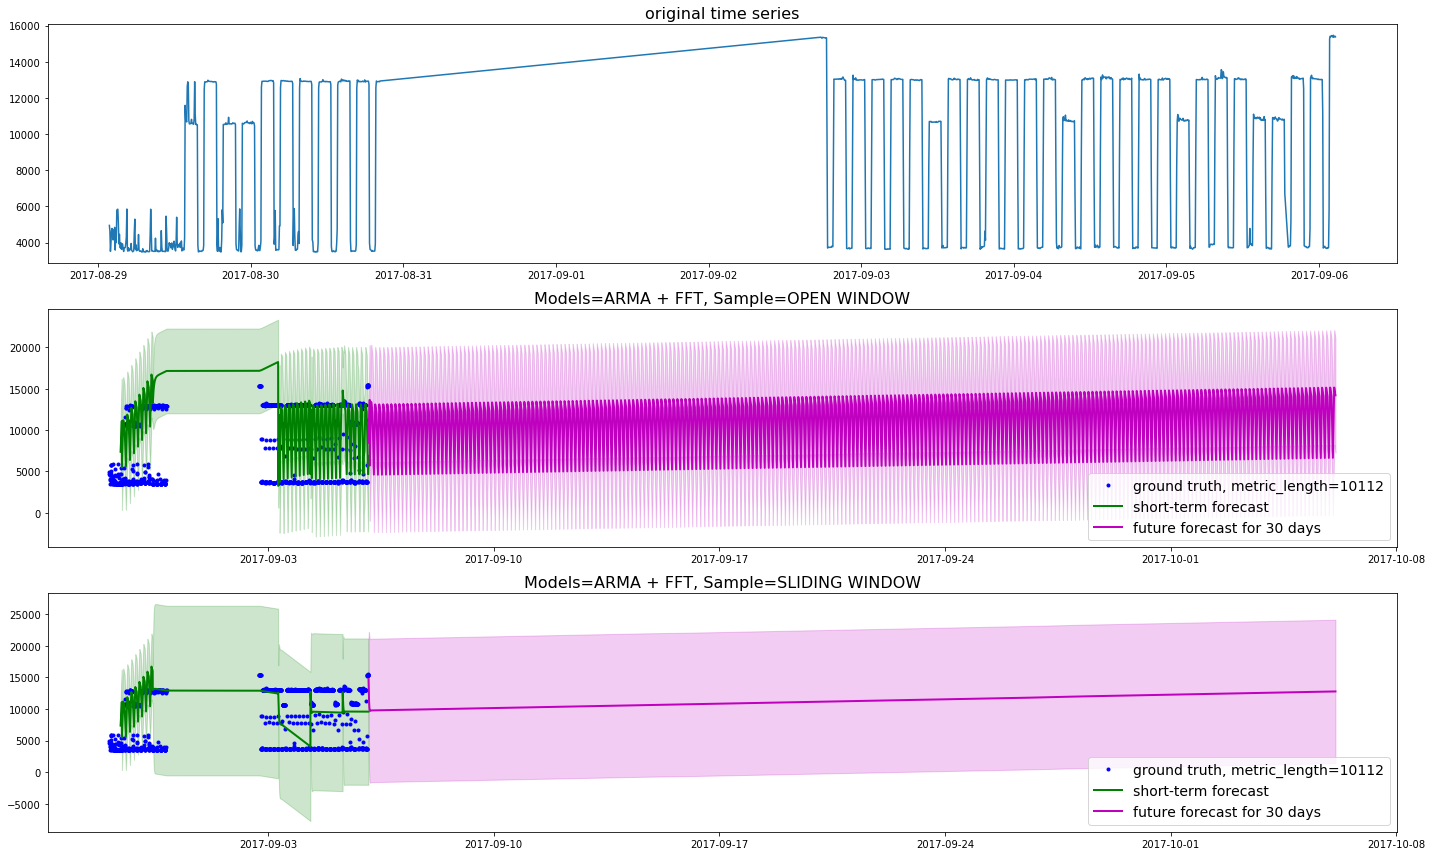

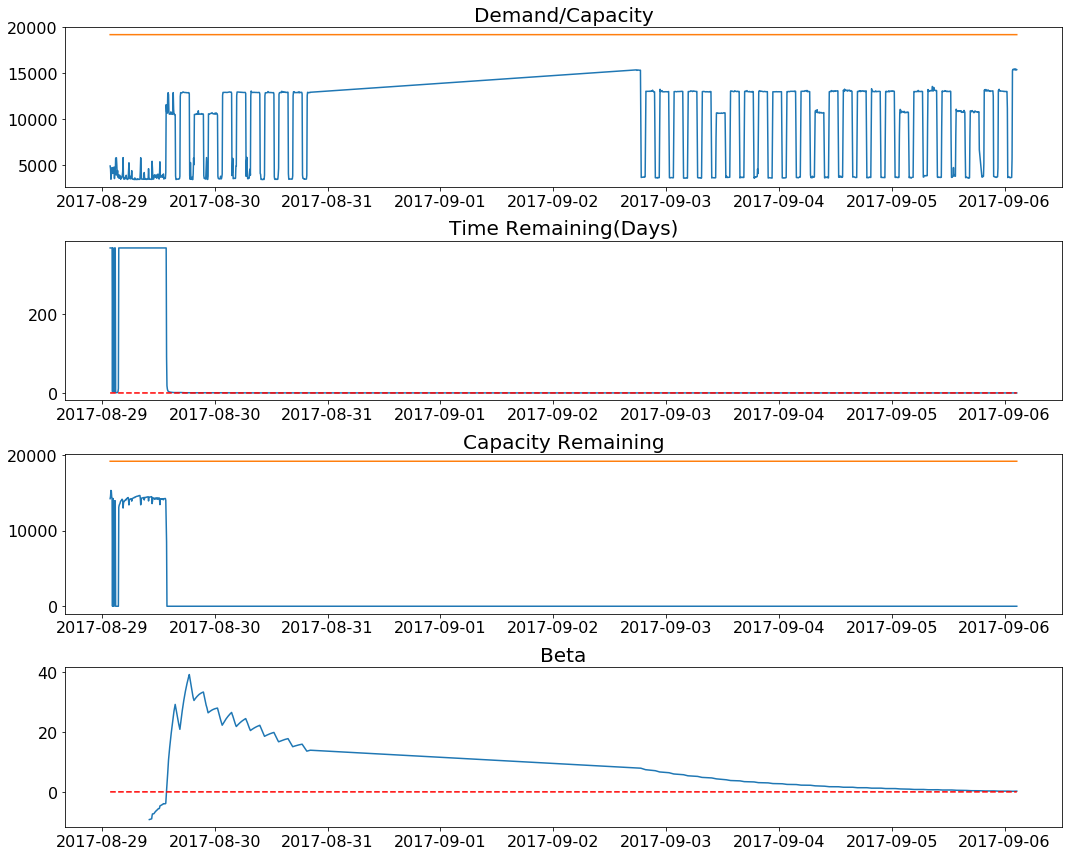

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1951911


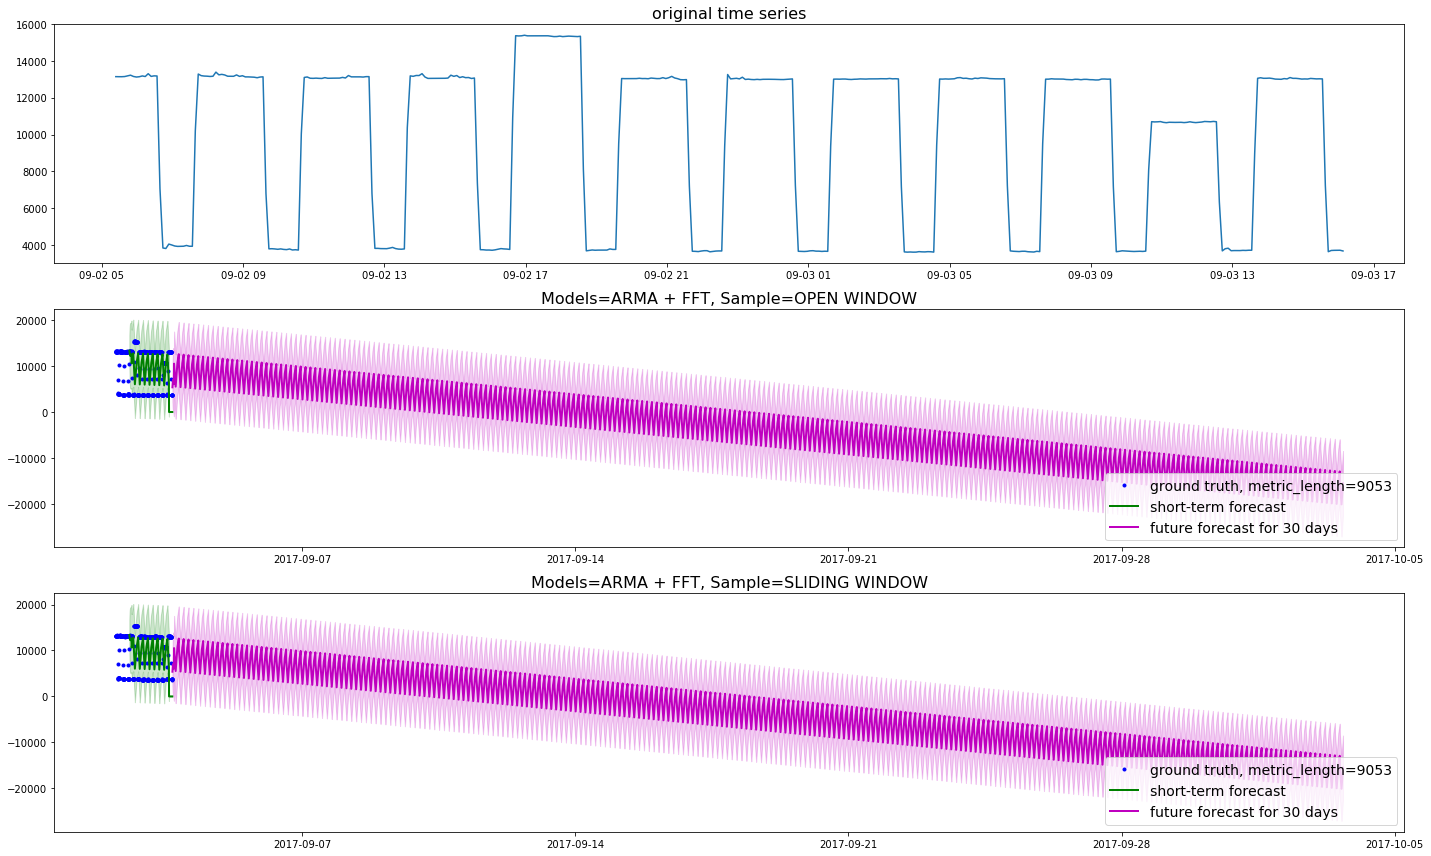

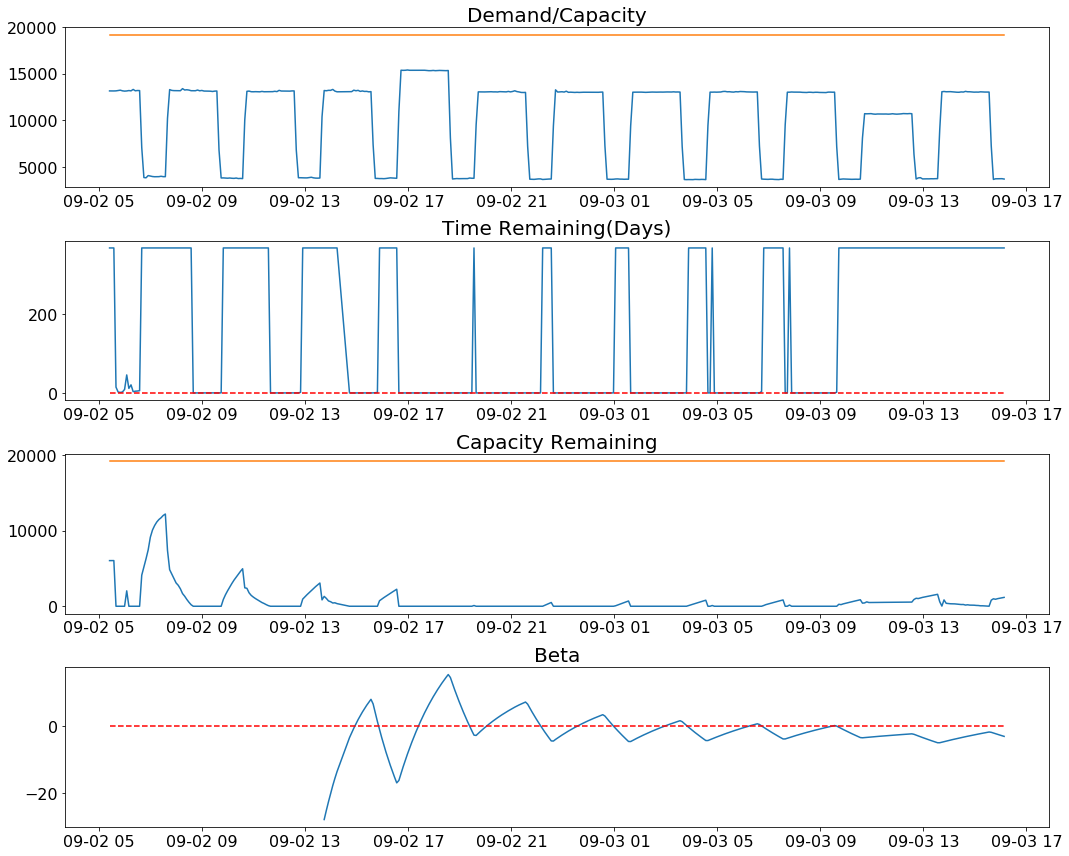

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1953300


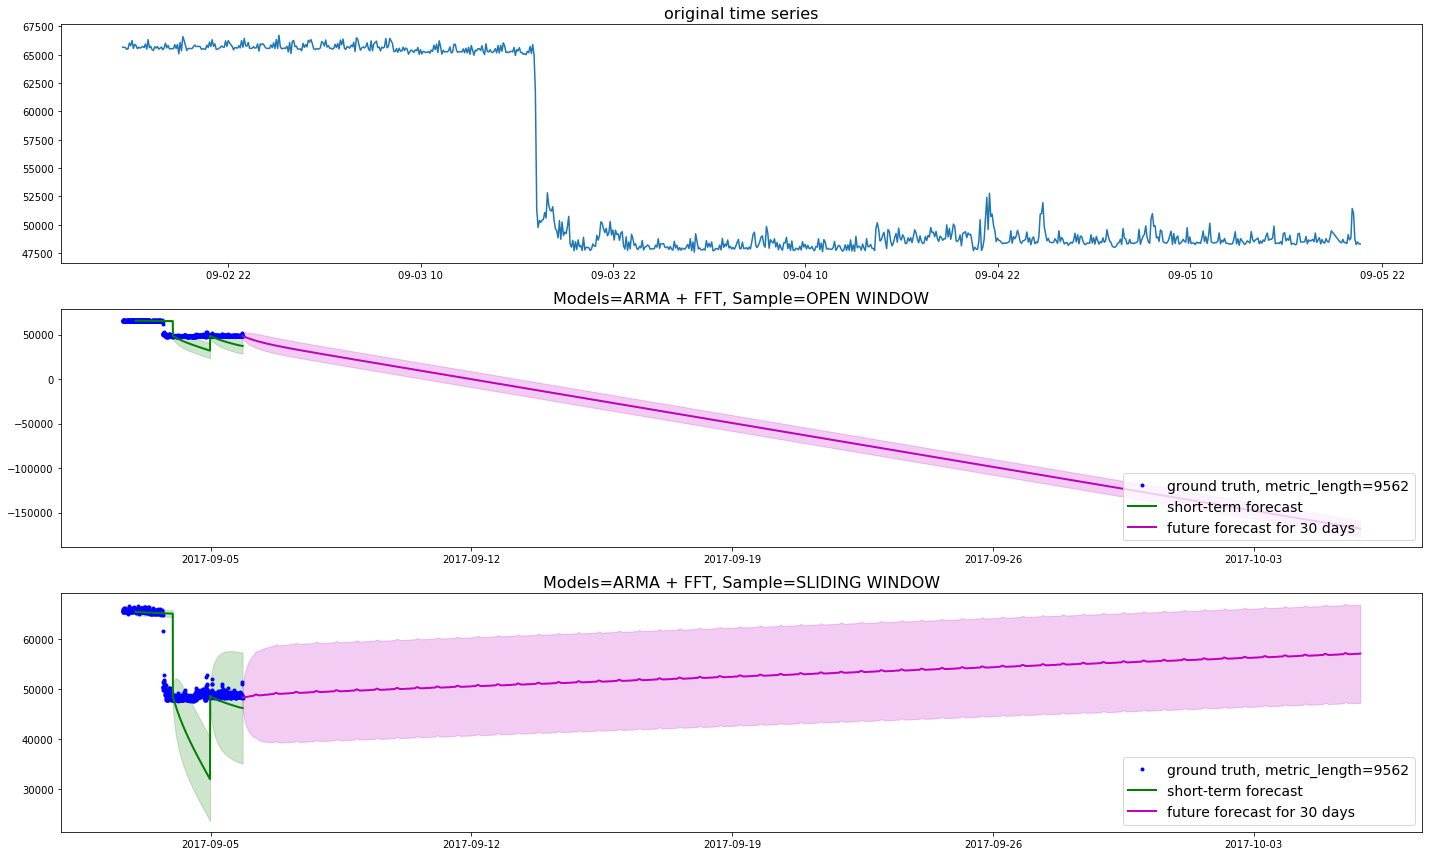

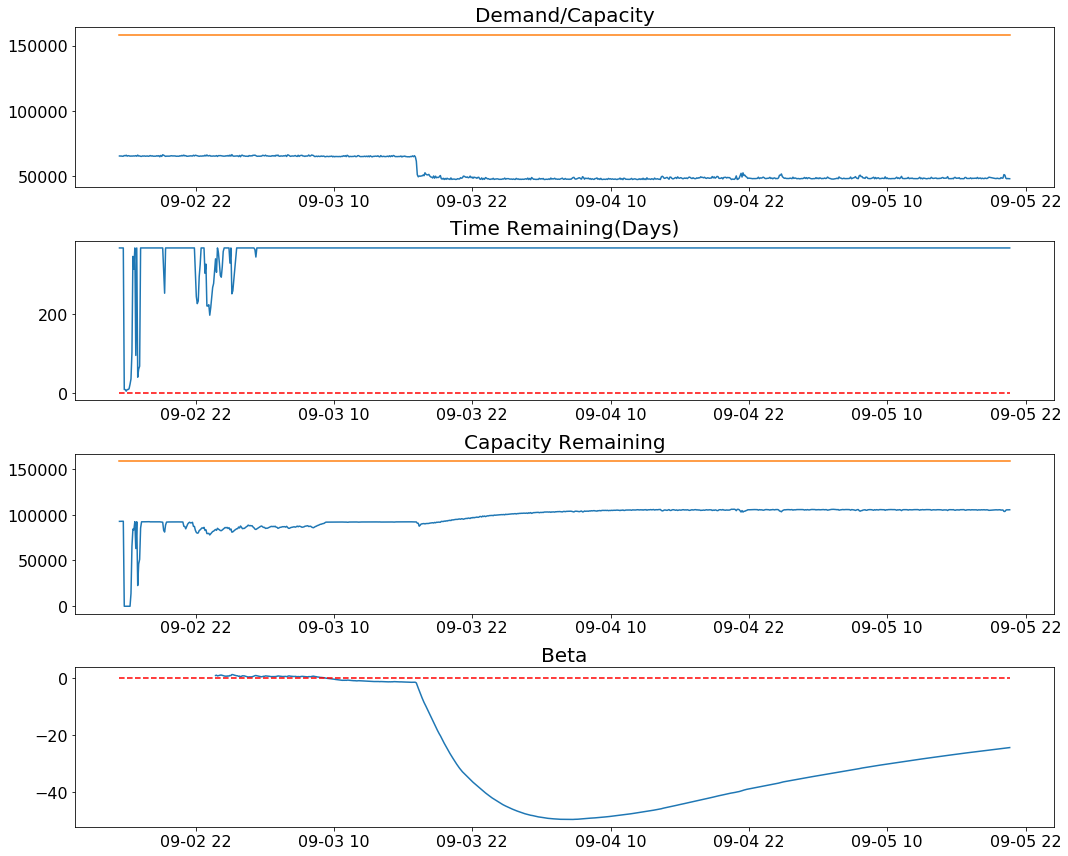

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1954261


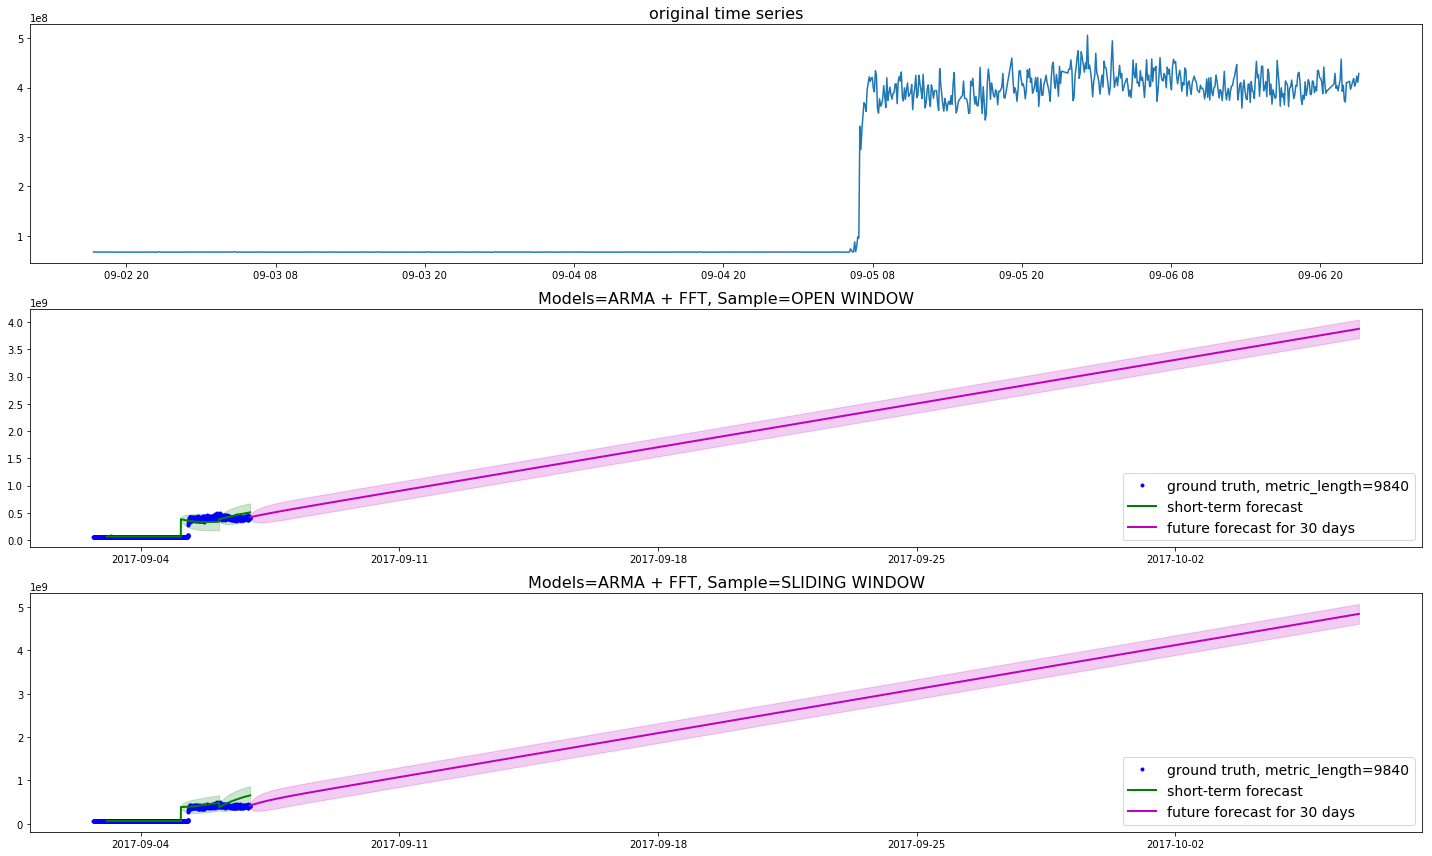

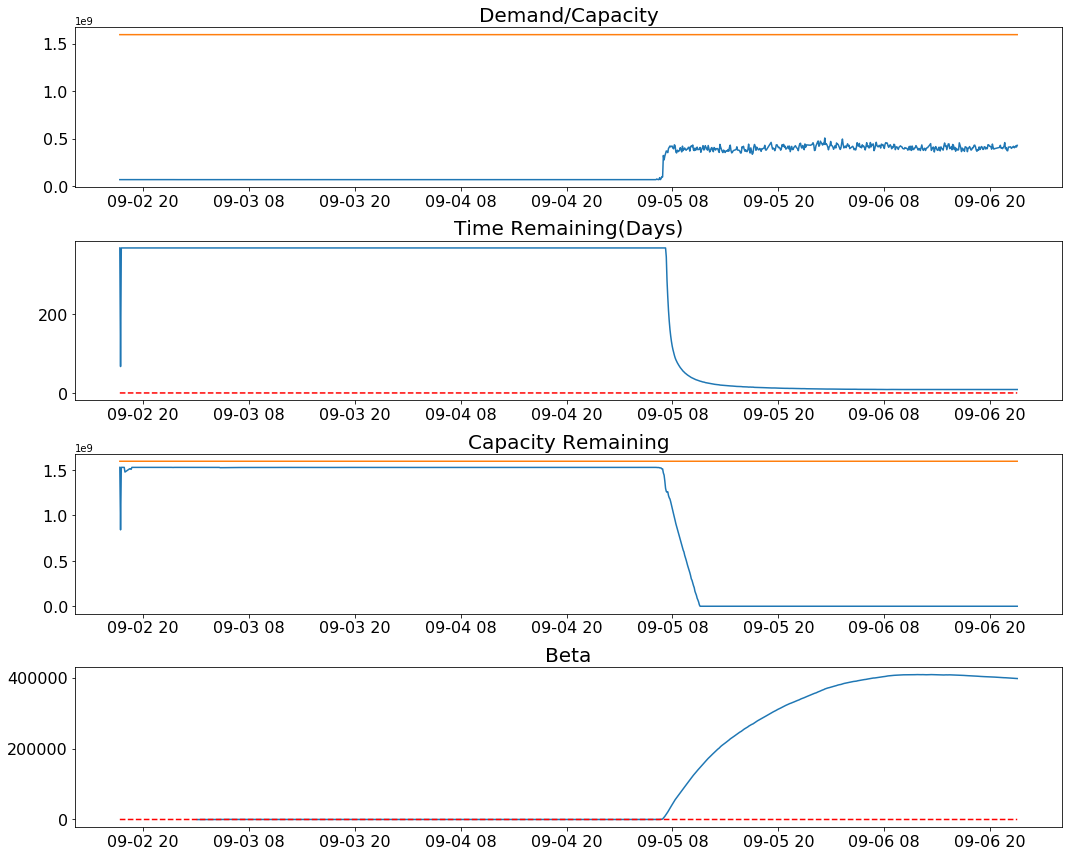

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1954982


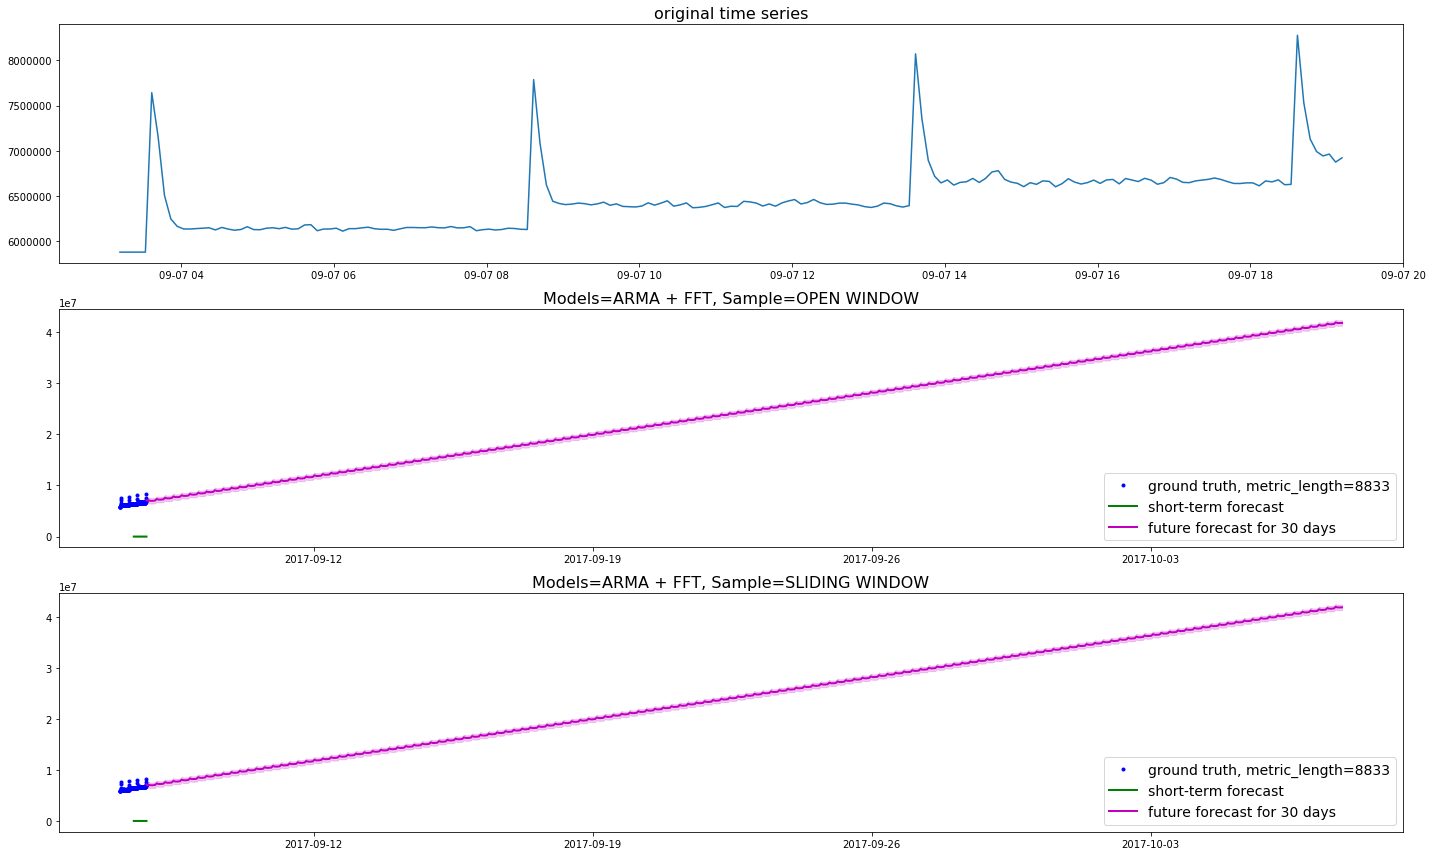

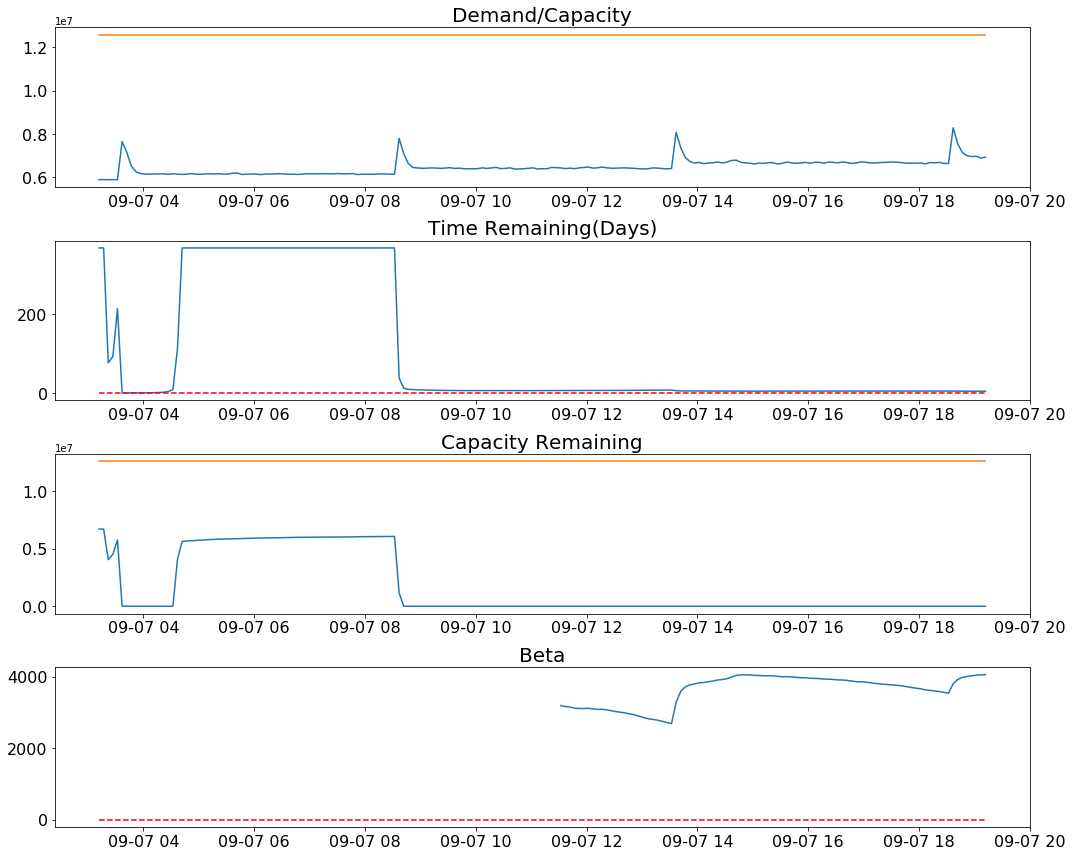

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1955035


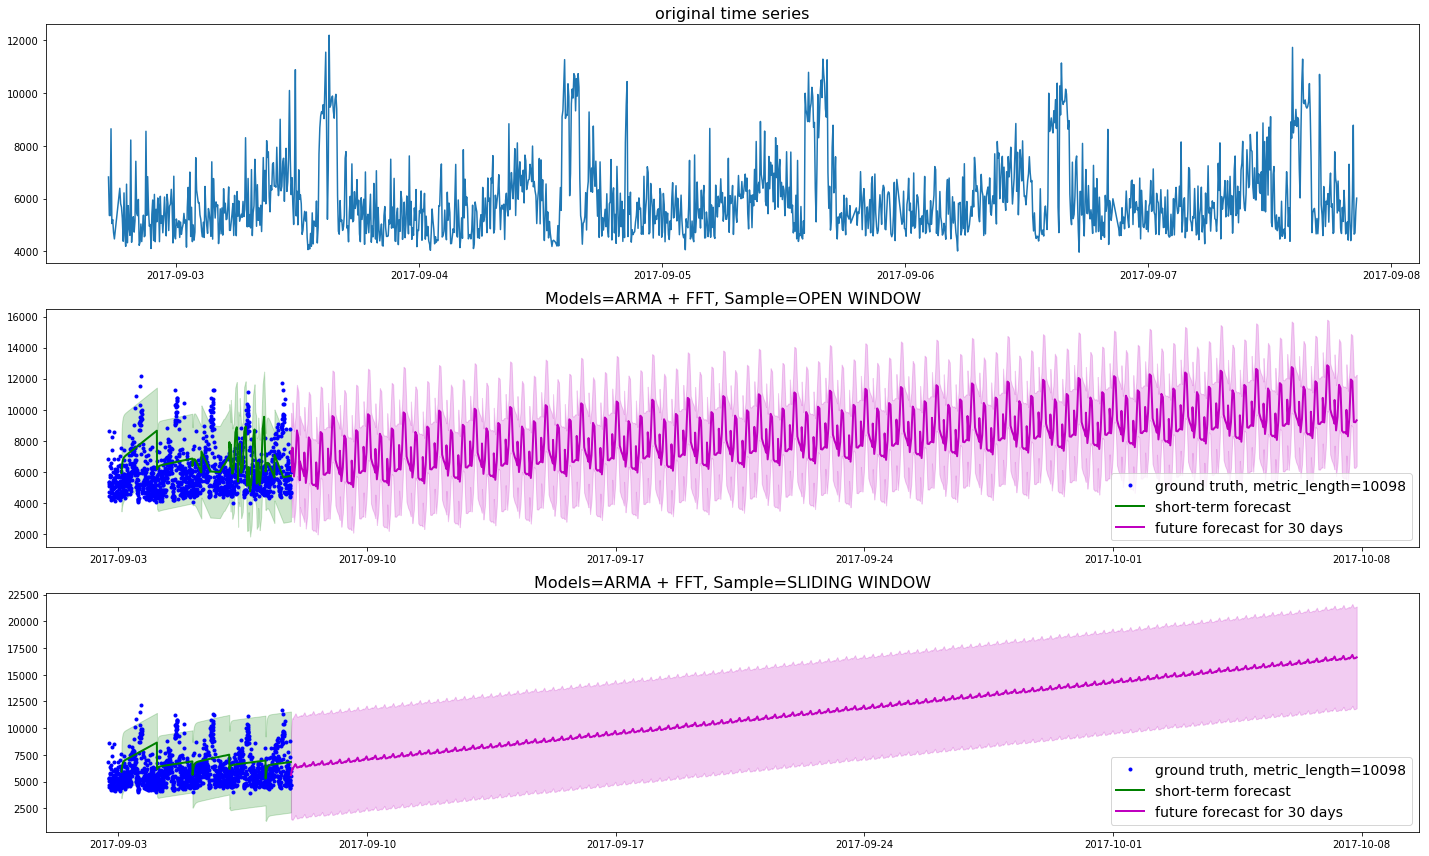

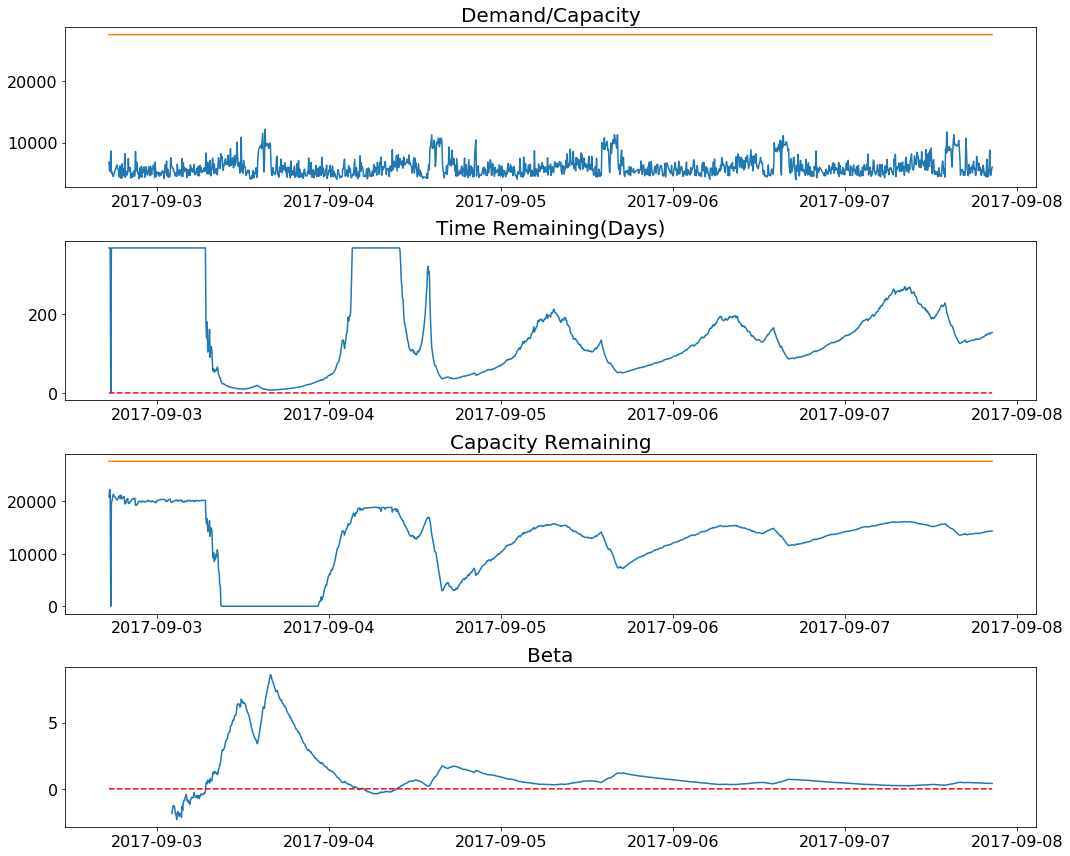

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1957236


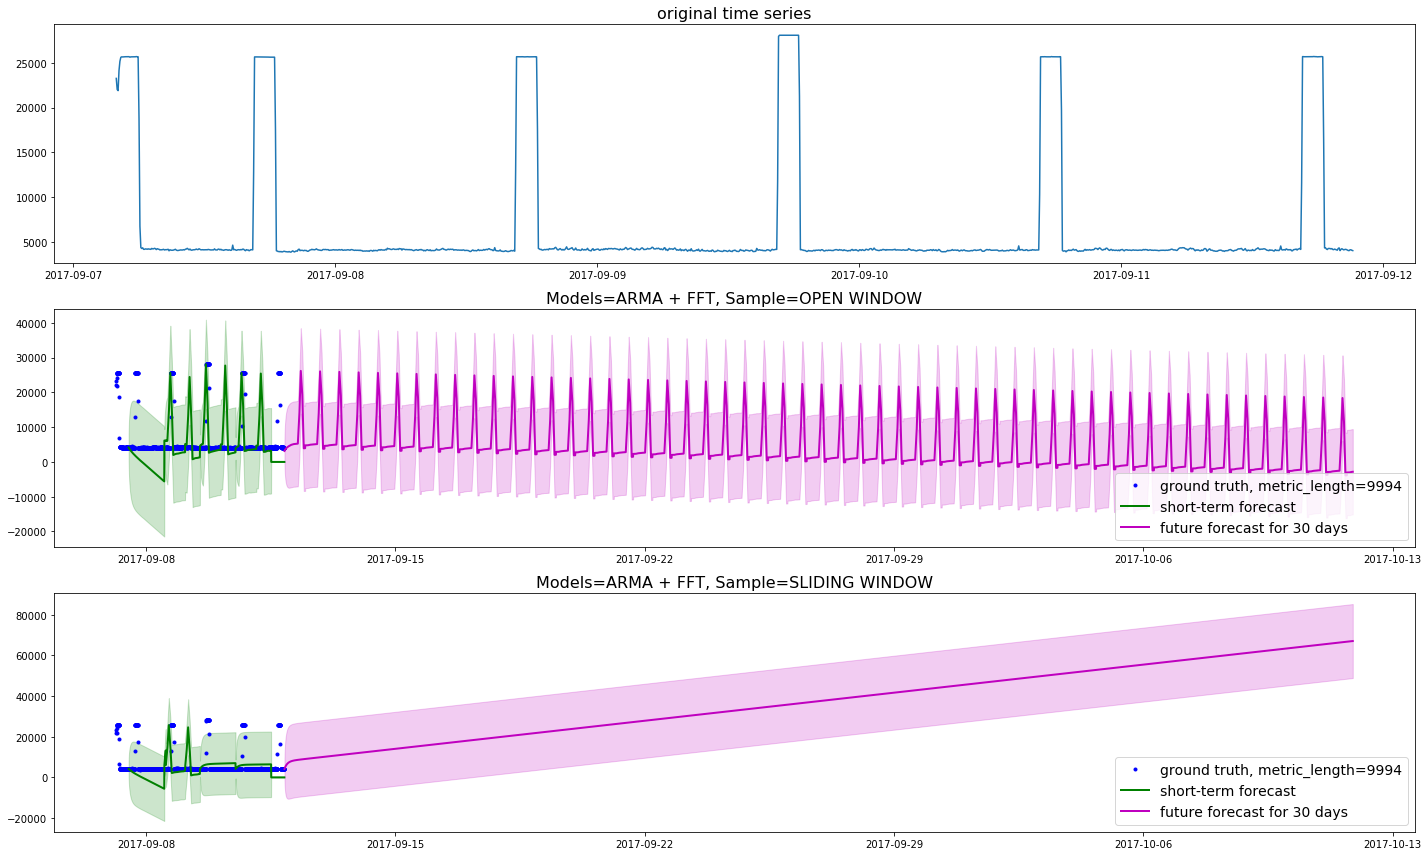

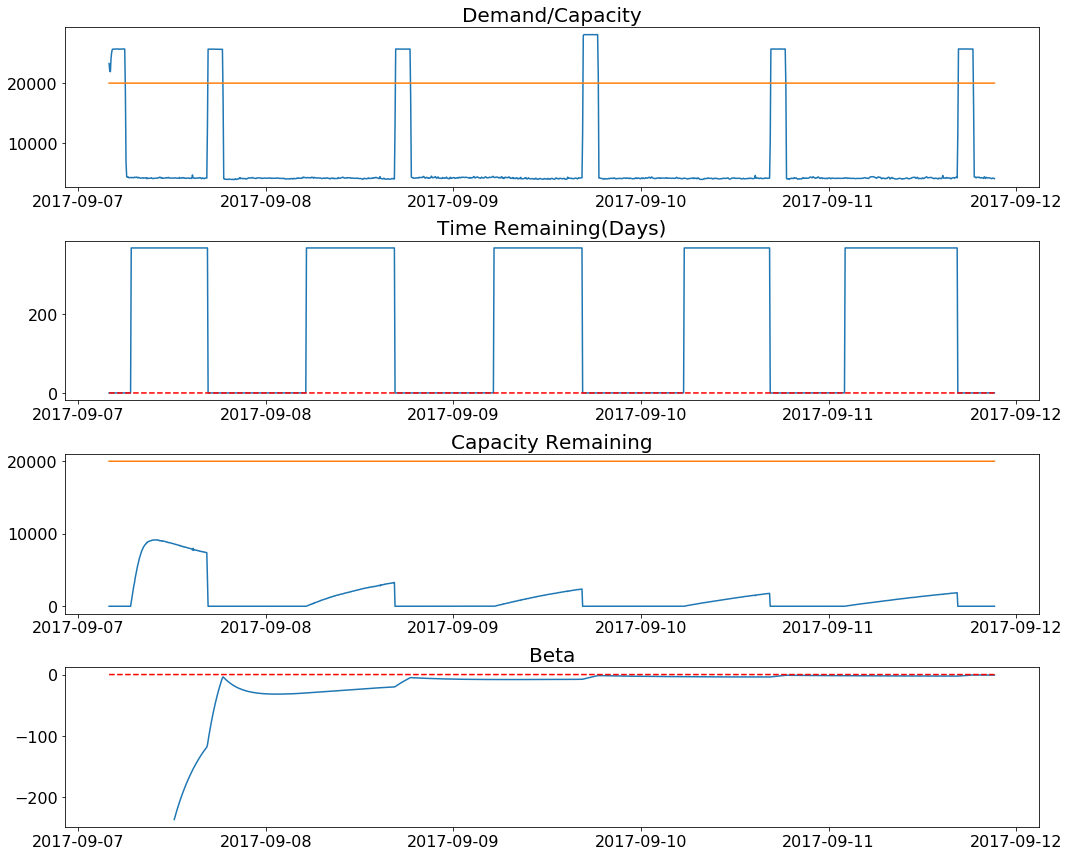

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1962140


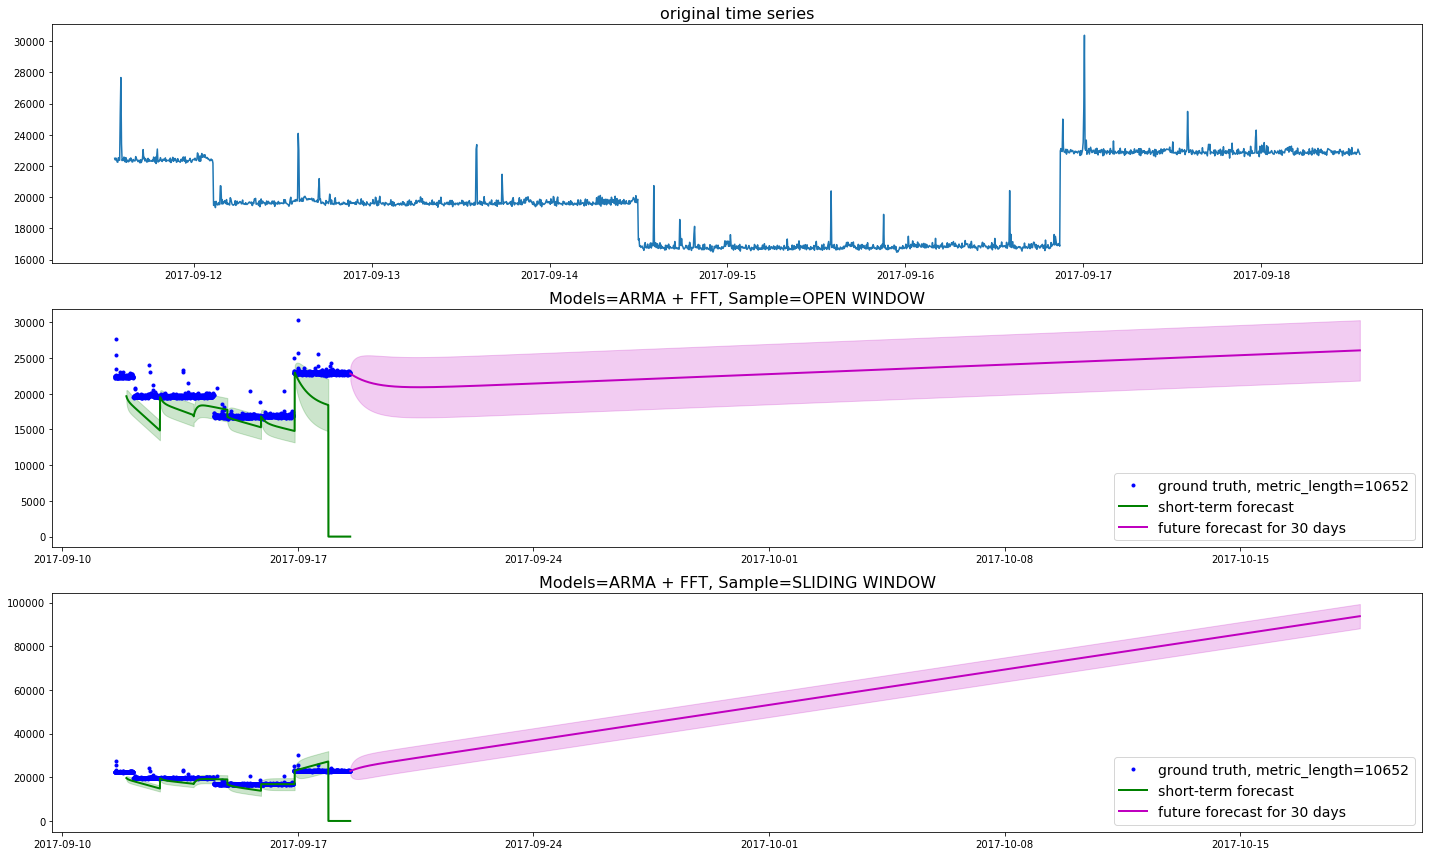

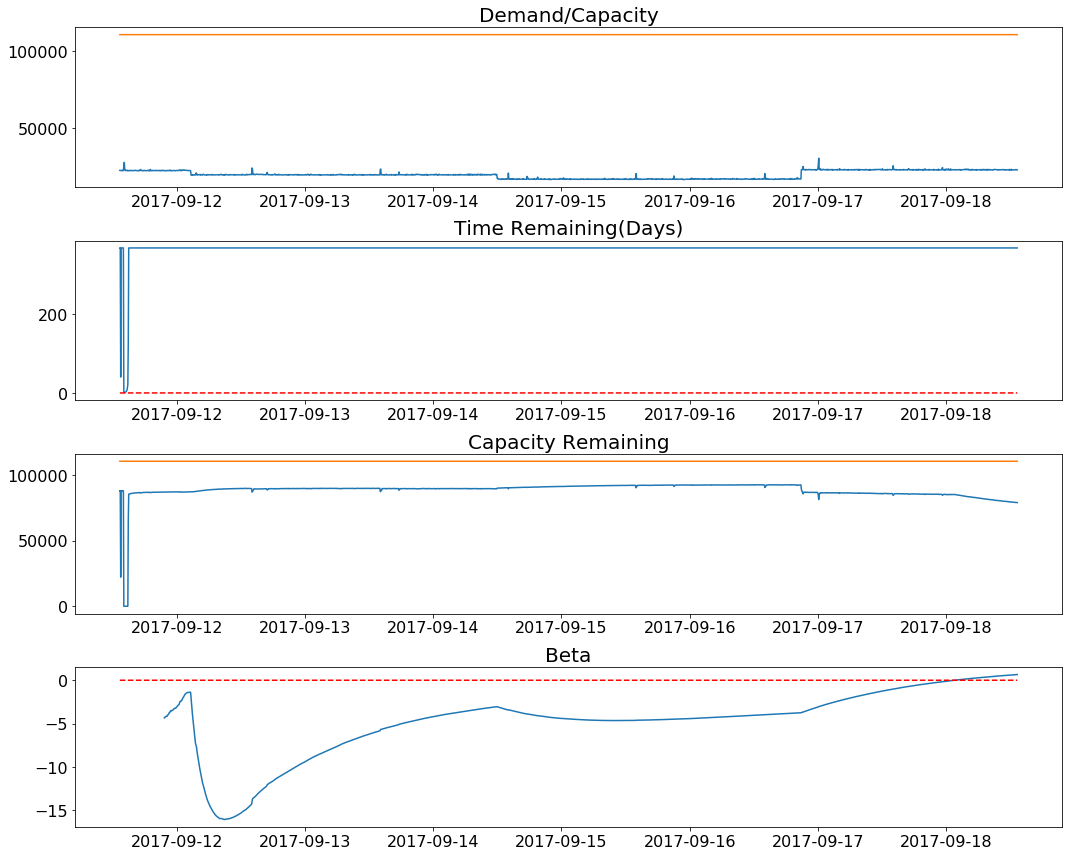

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1962186


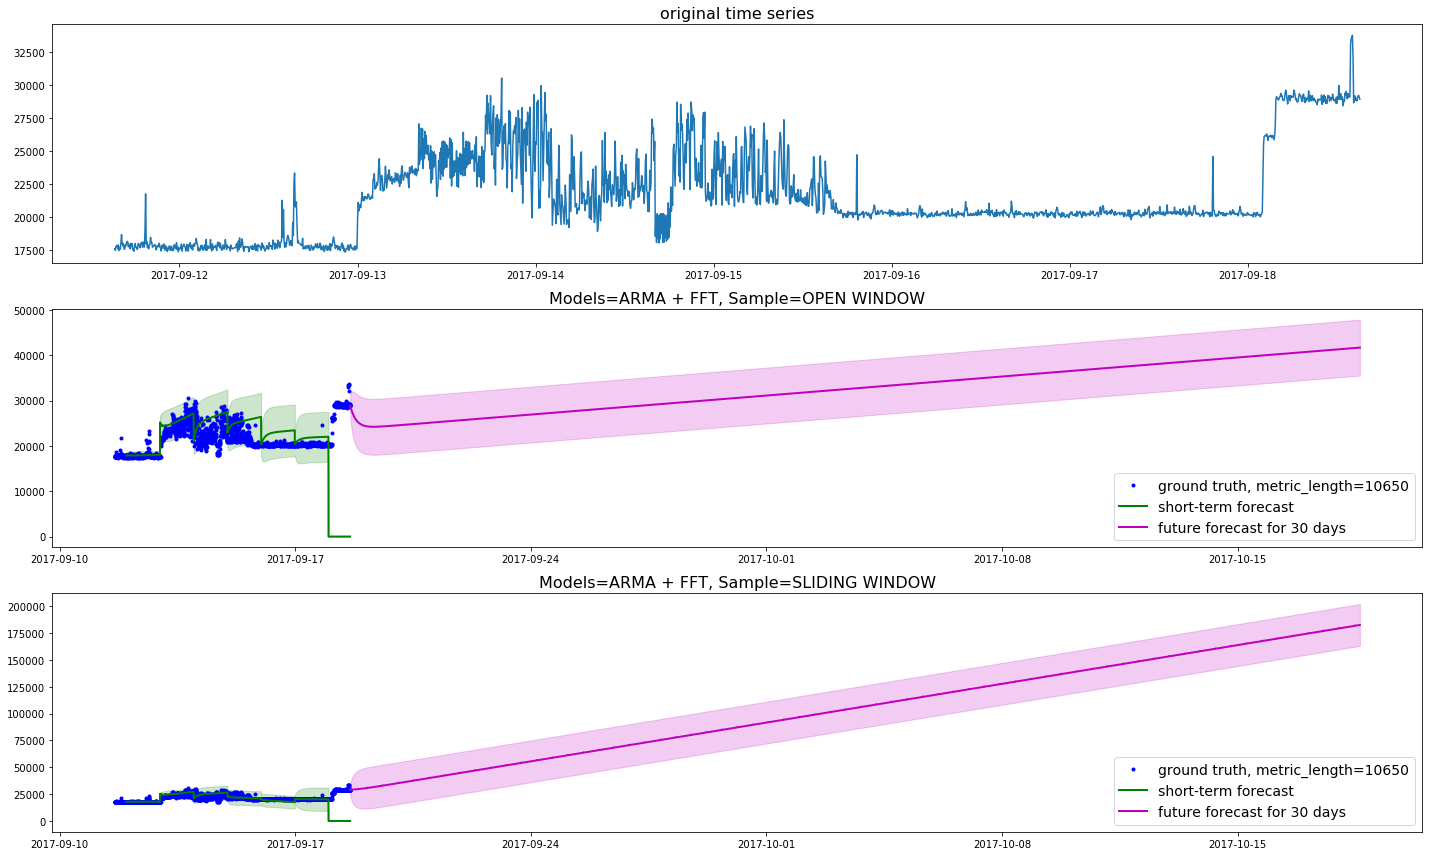

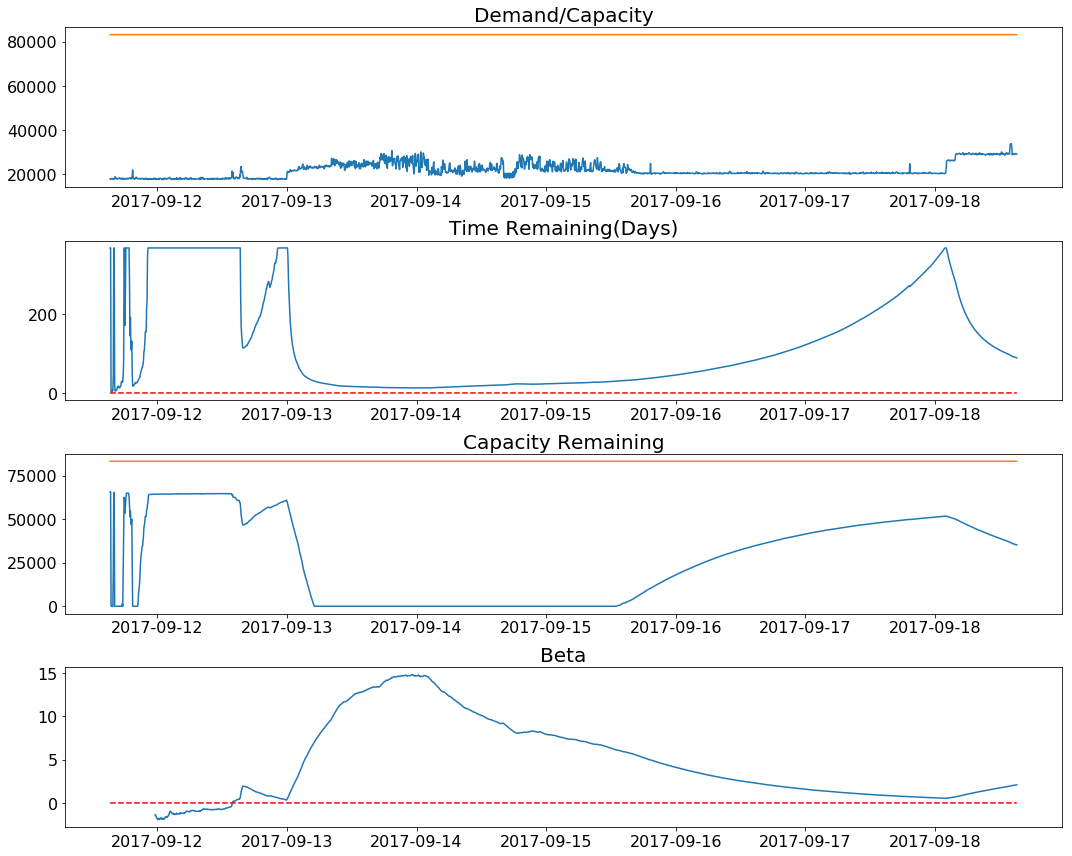

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1962233


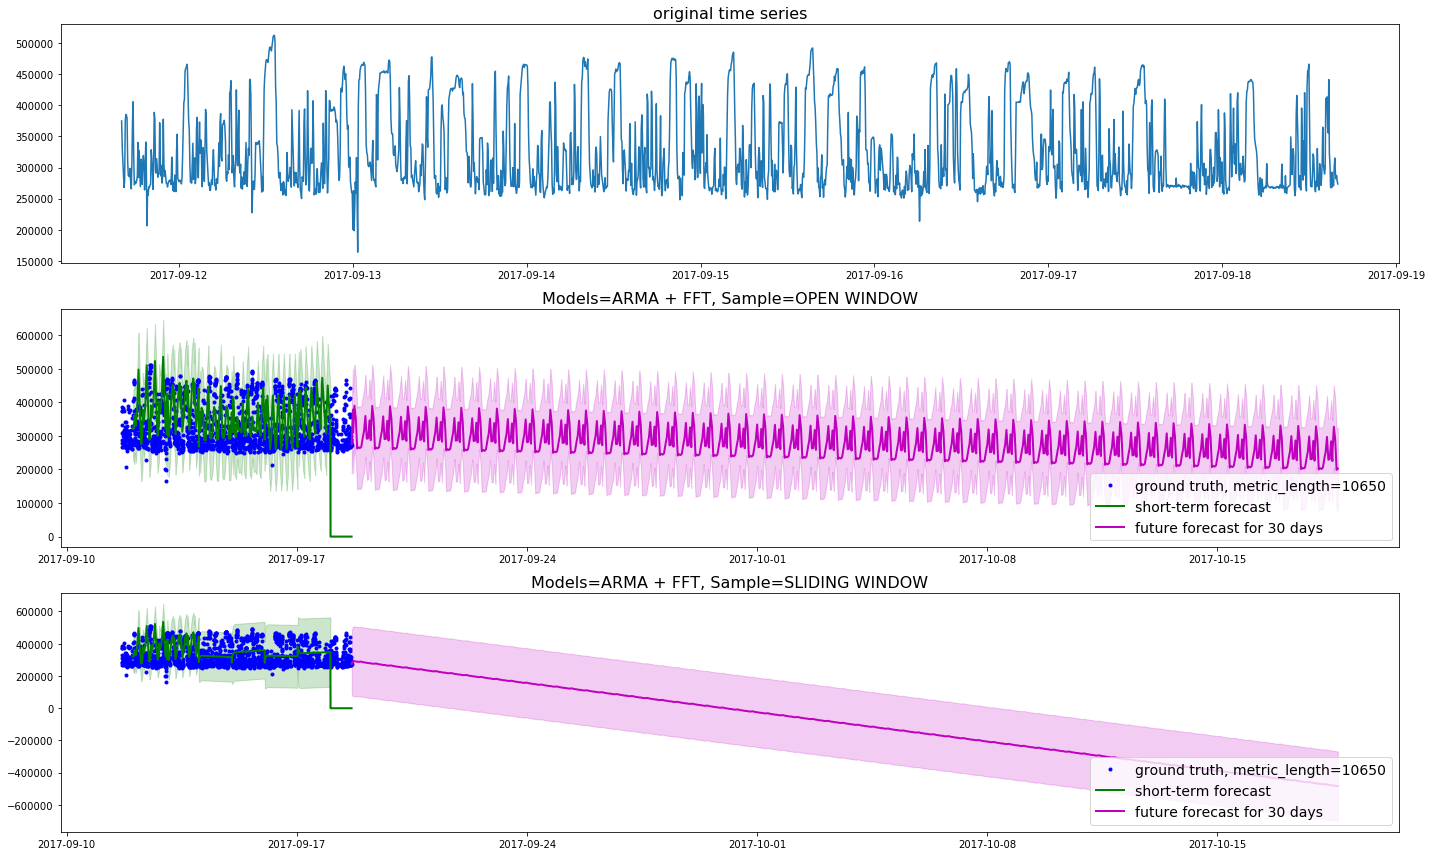

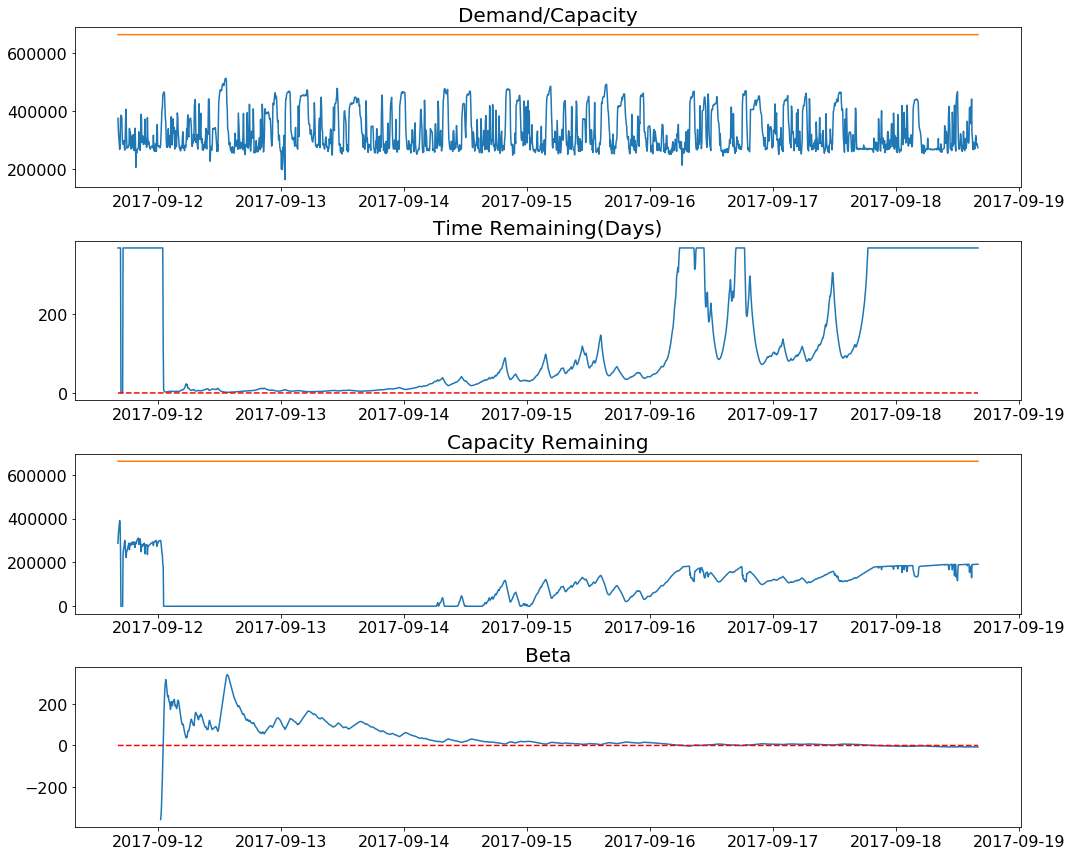

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963061


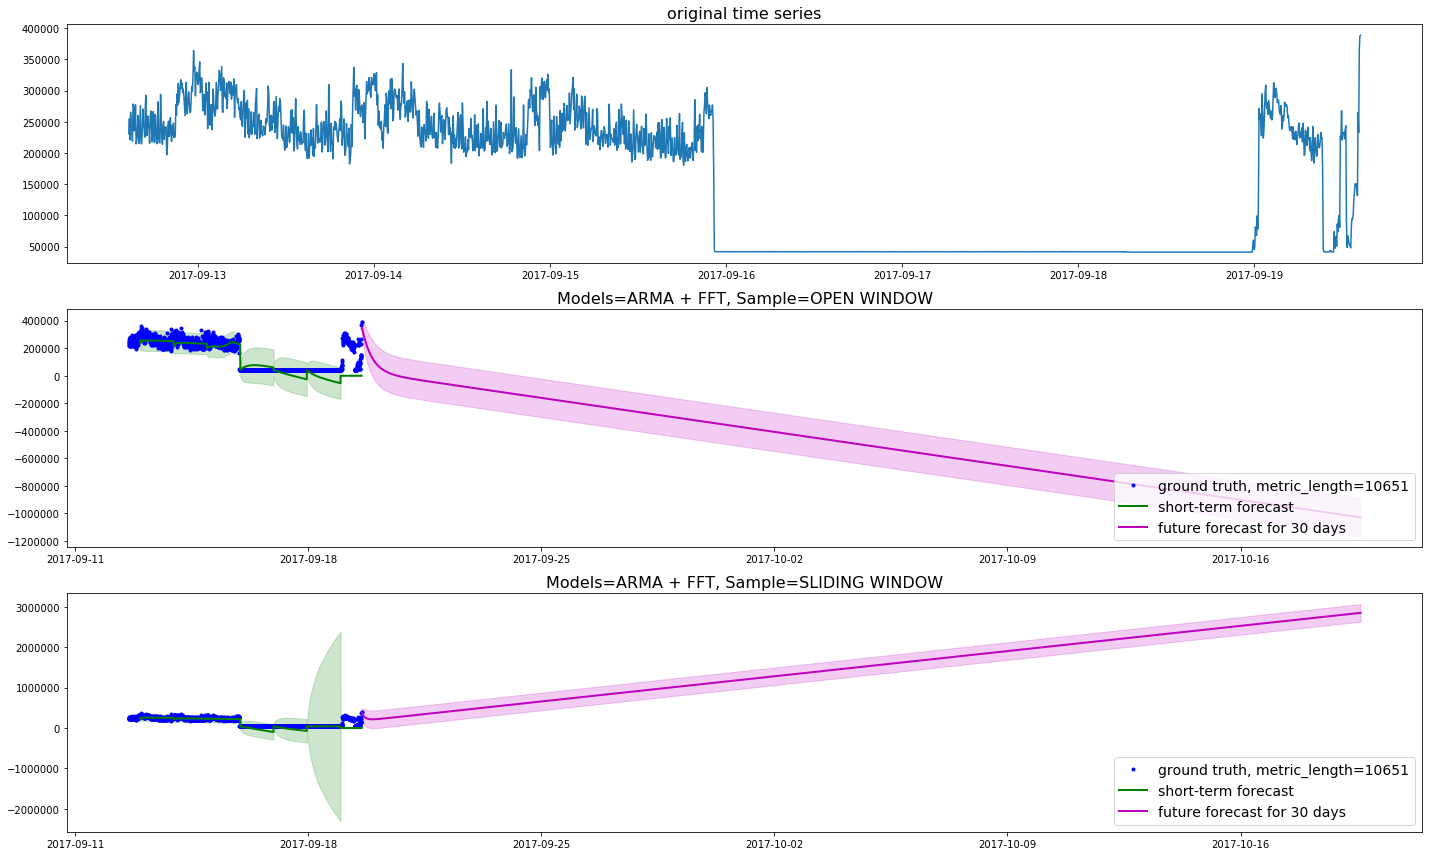

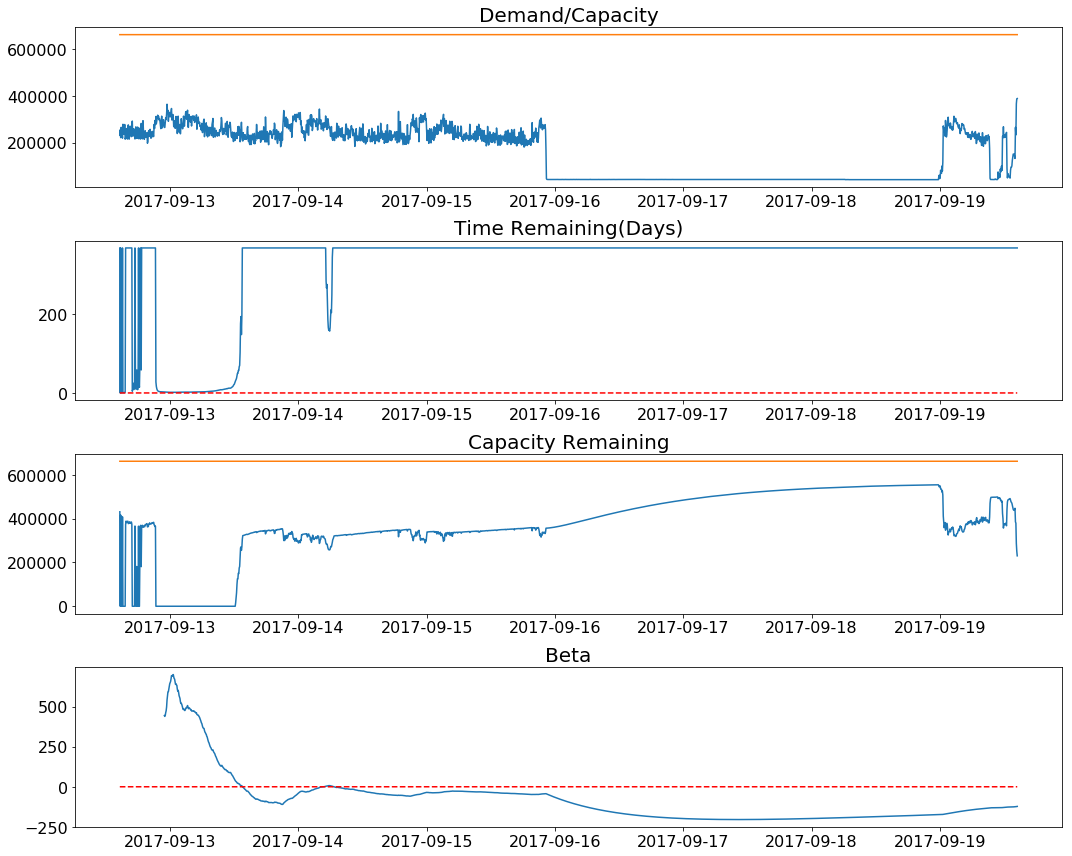

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963086


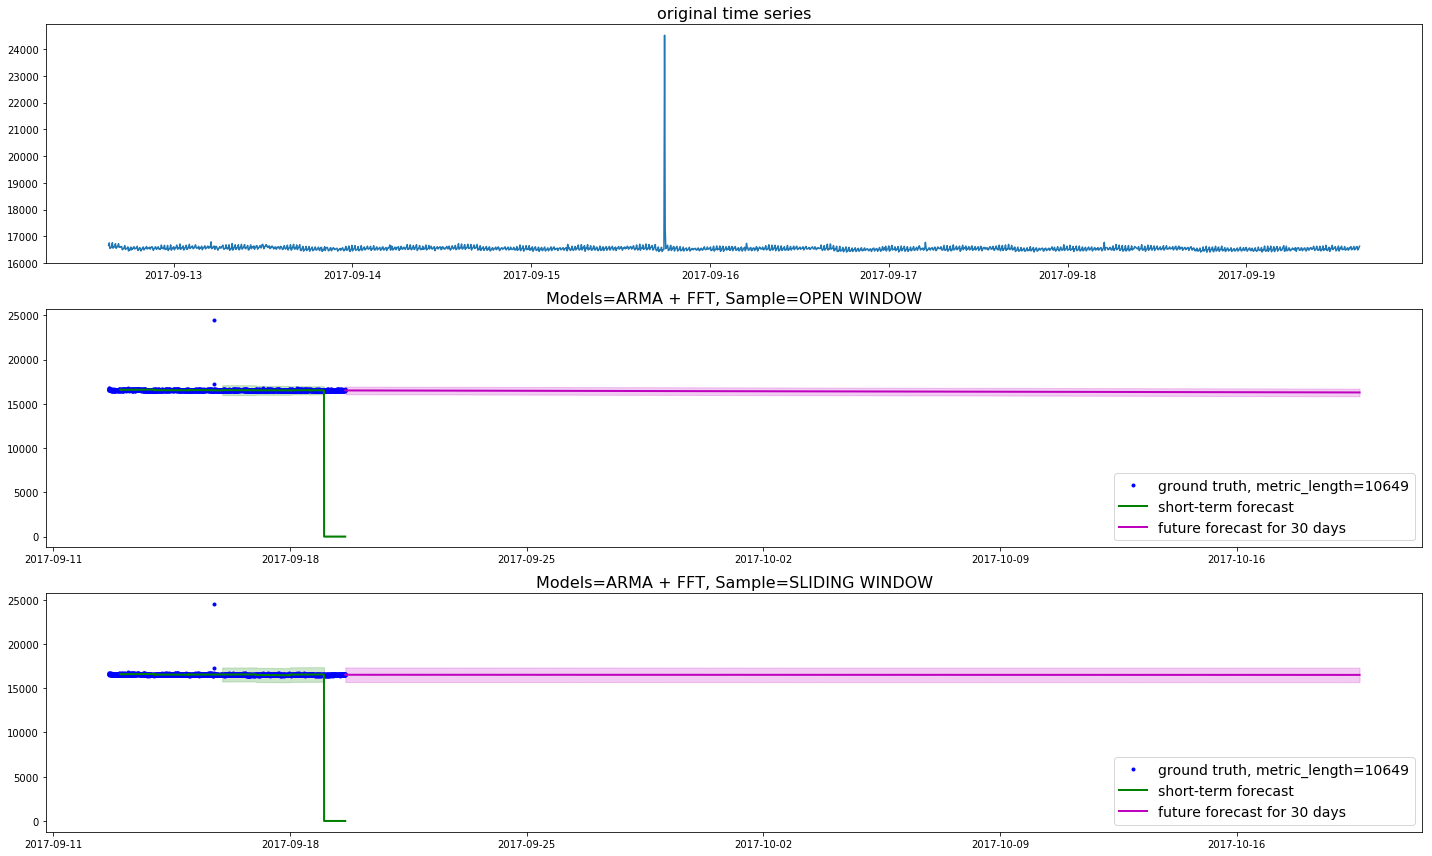

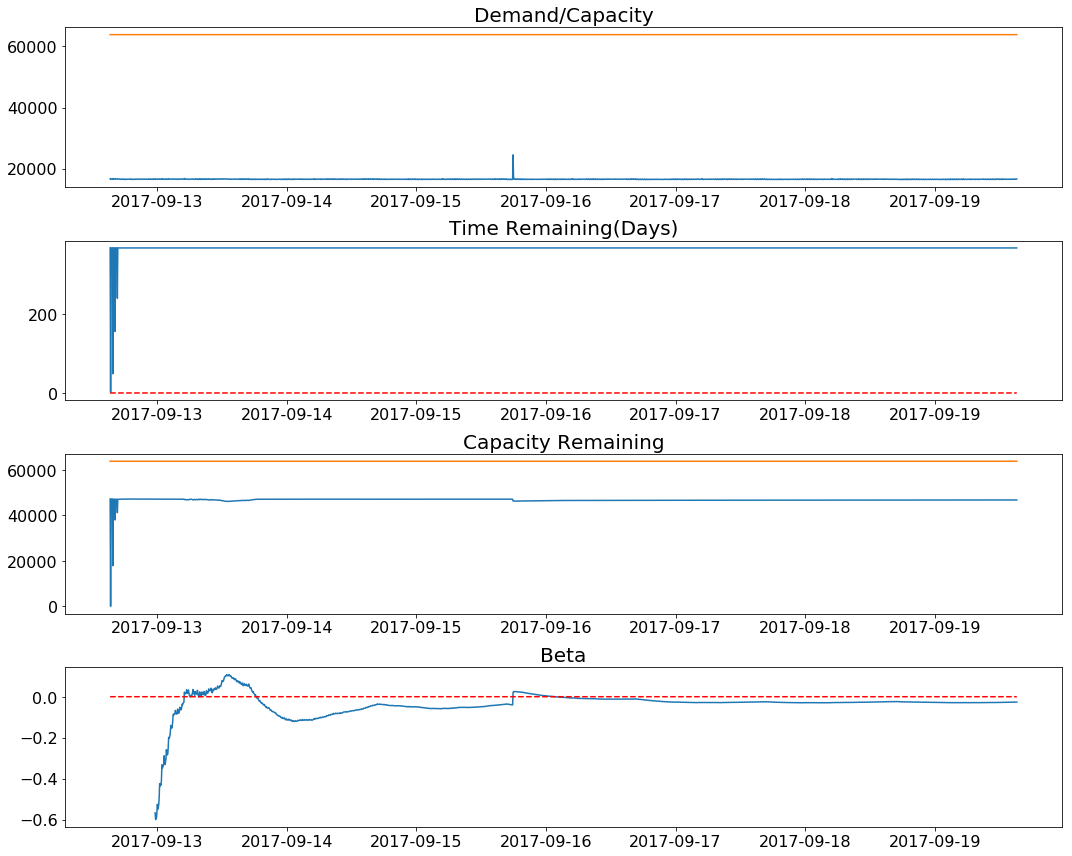

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963167


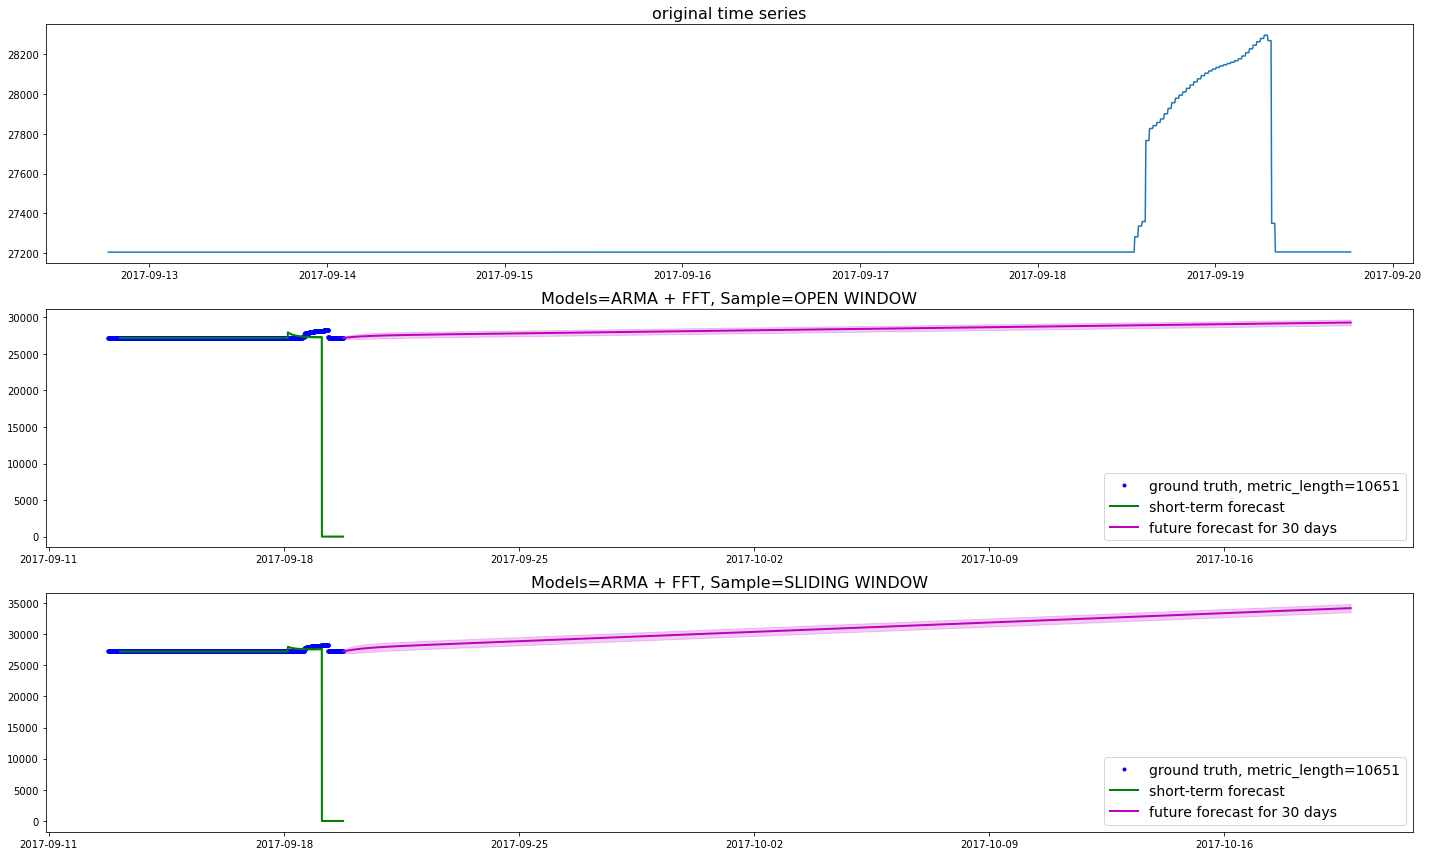

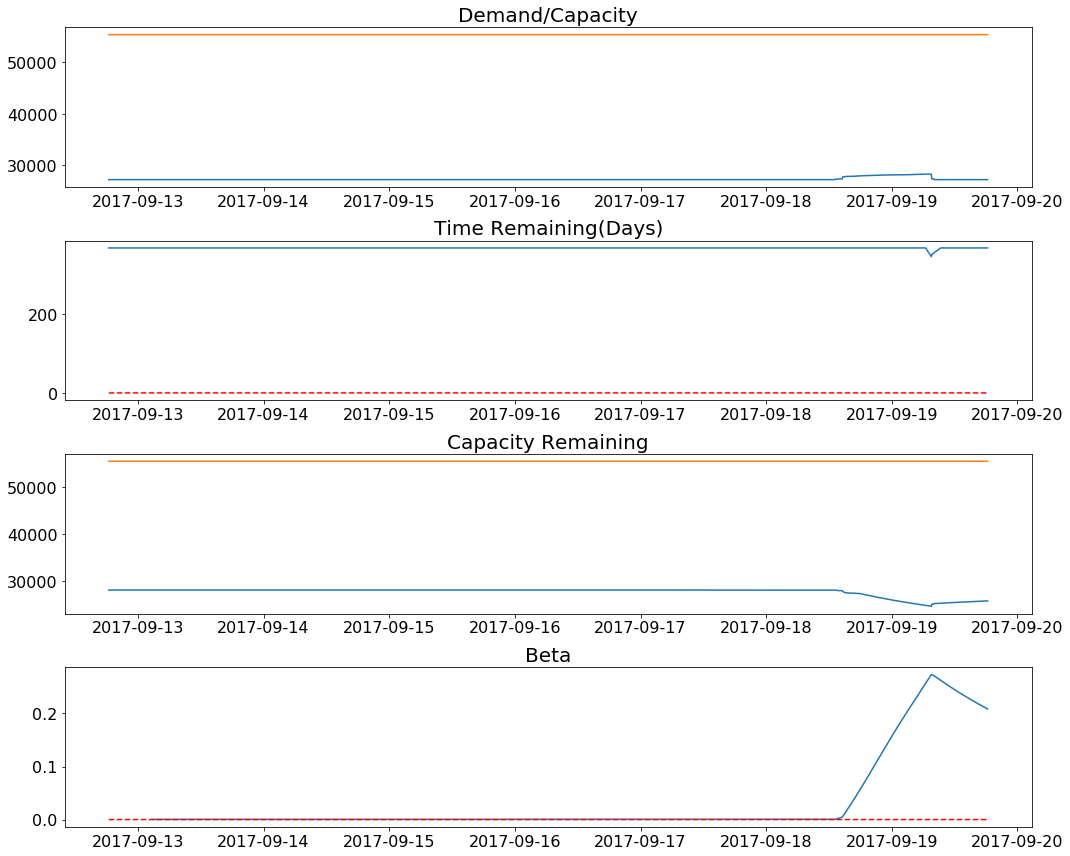

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963182


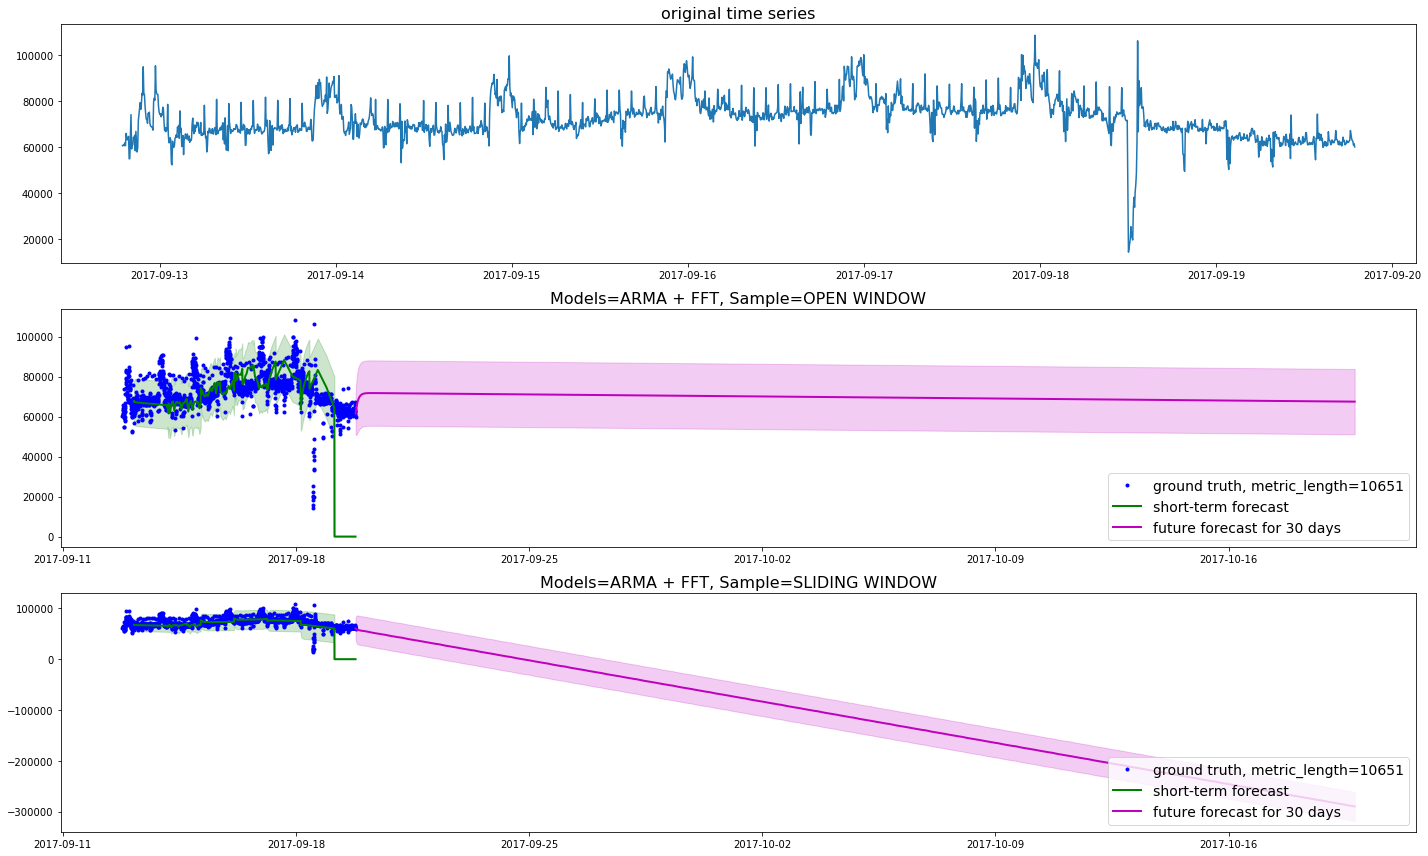

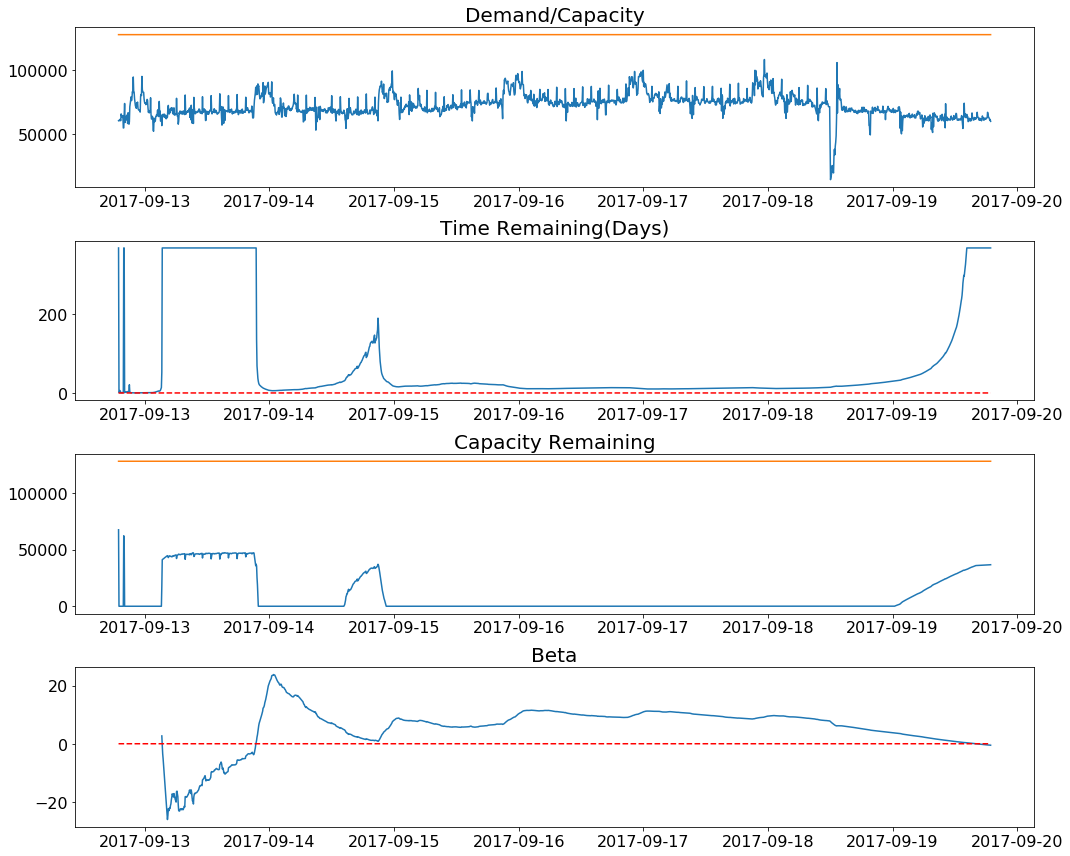

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963848


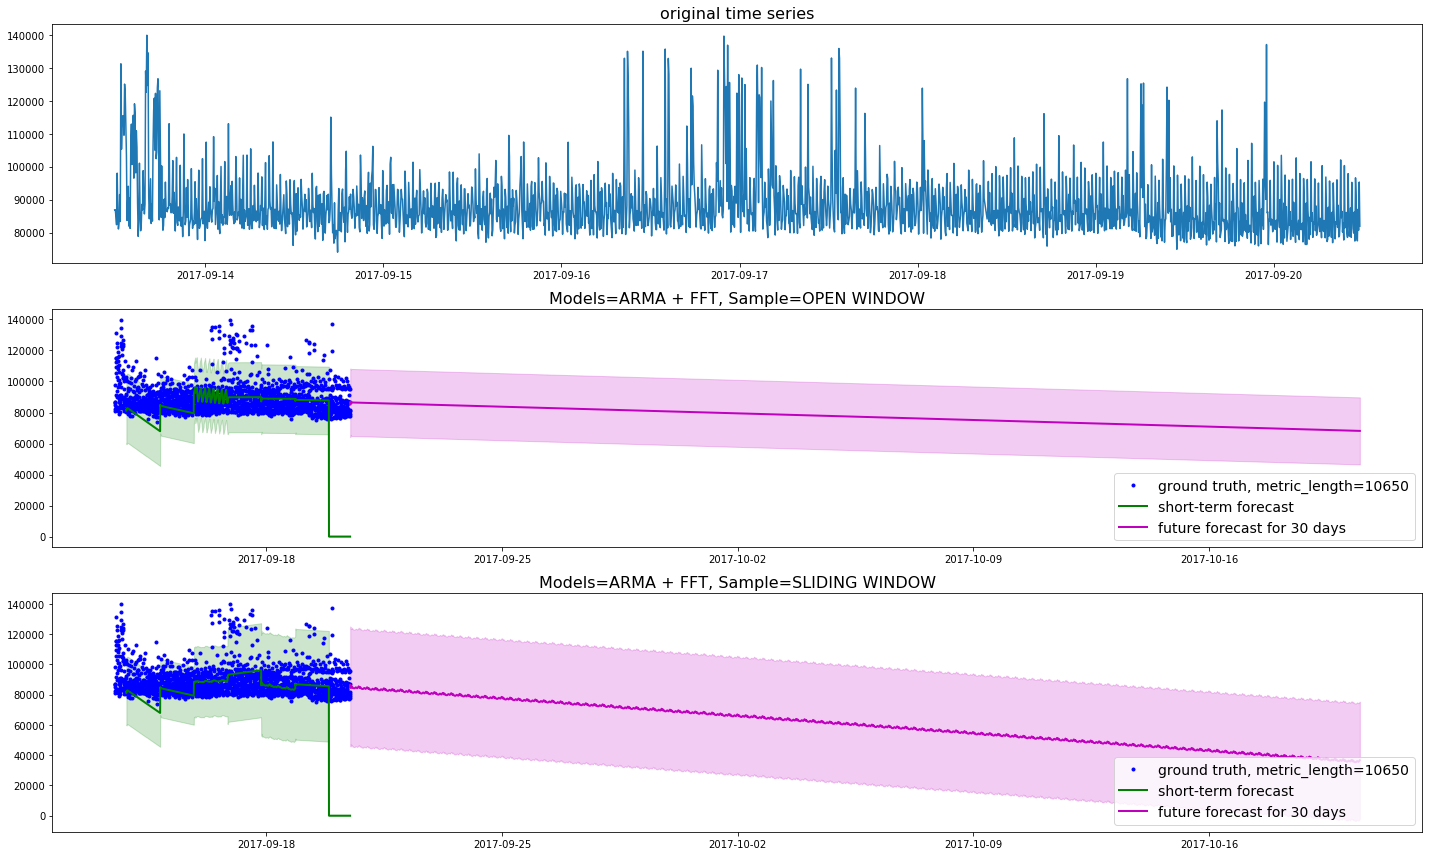

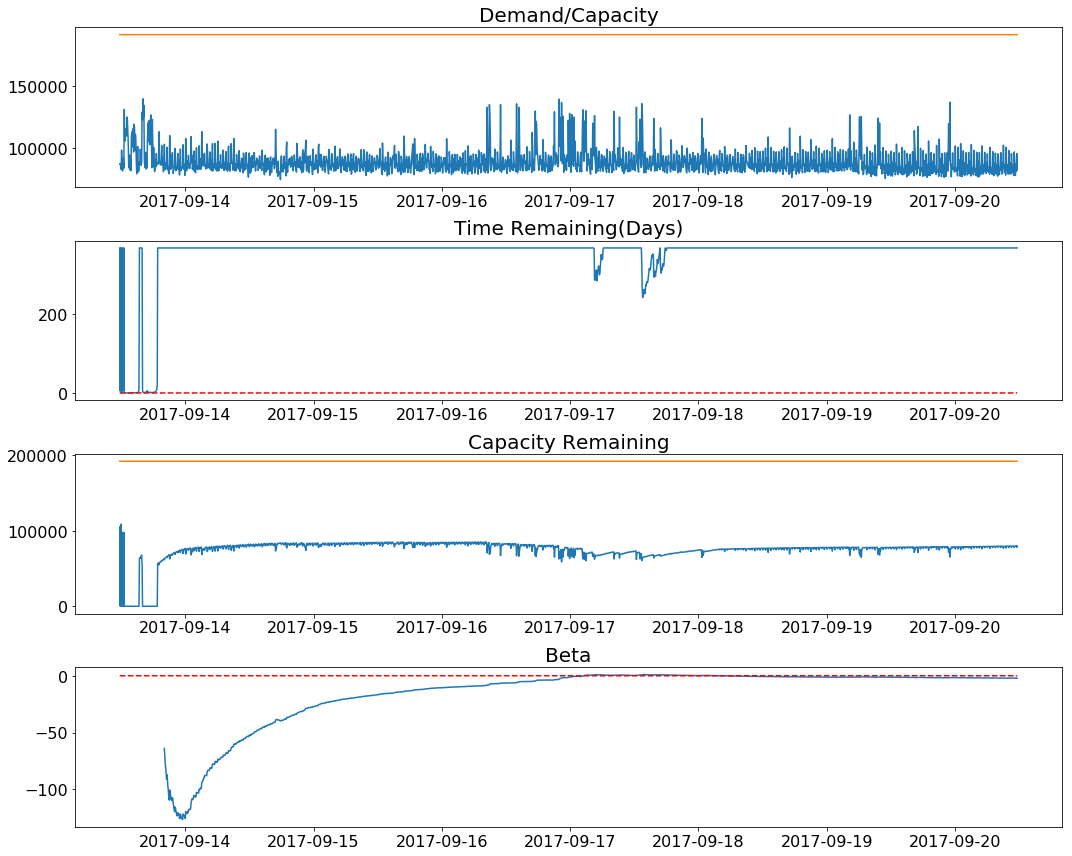

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963860


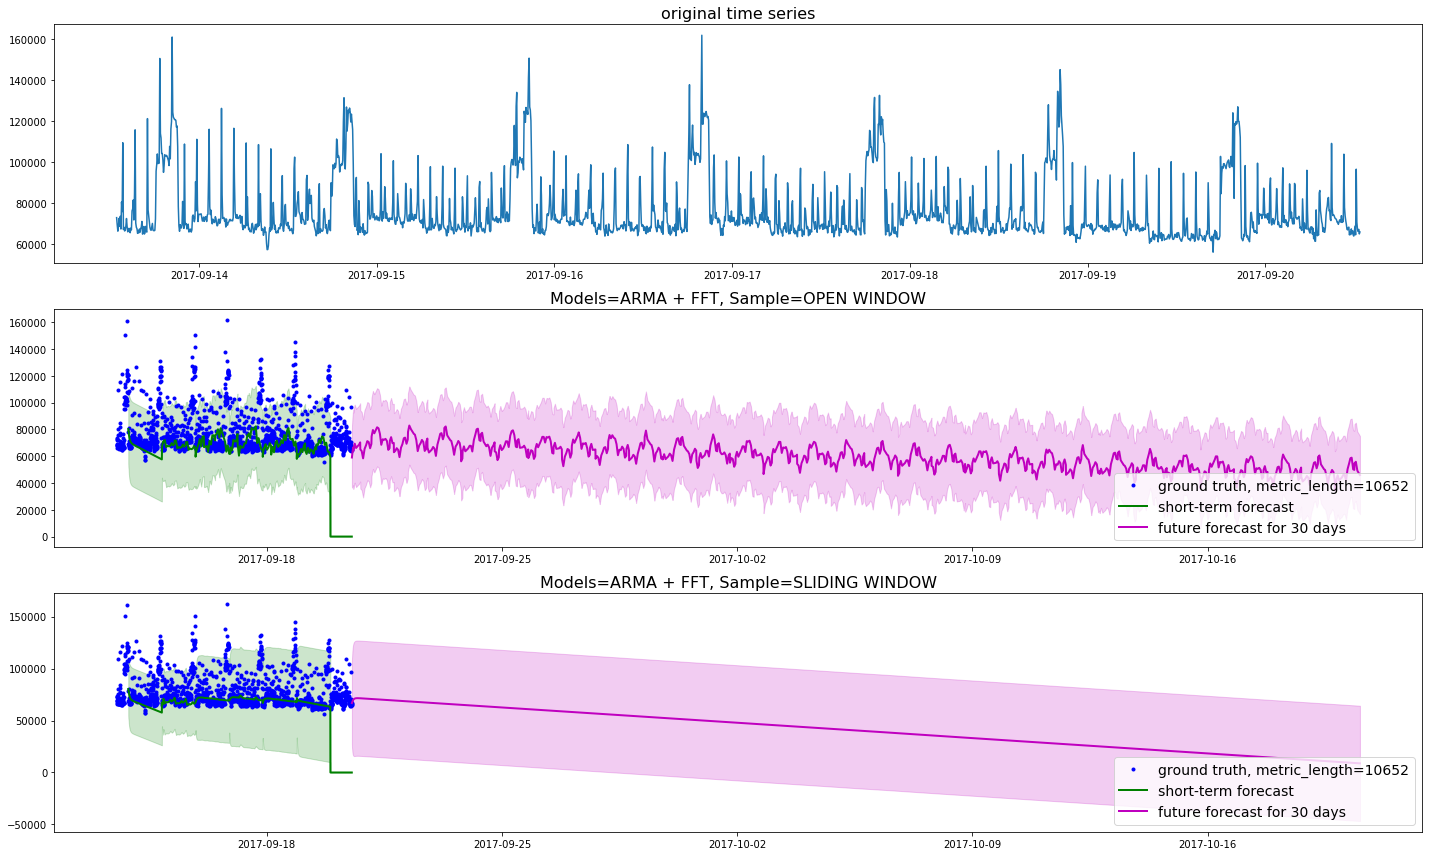

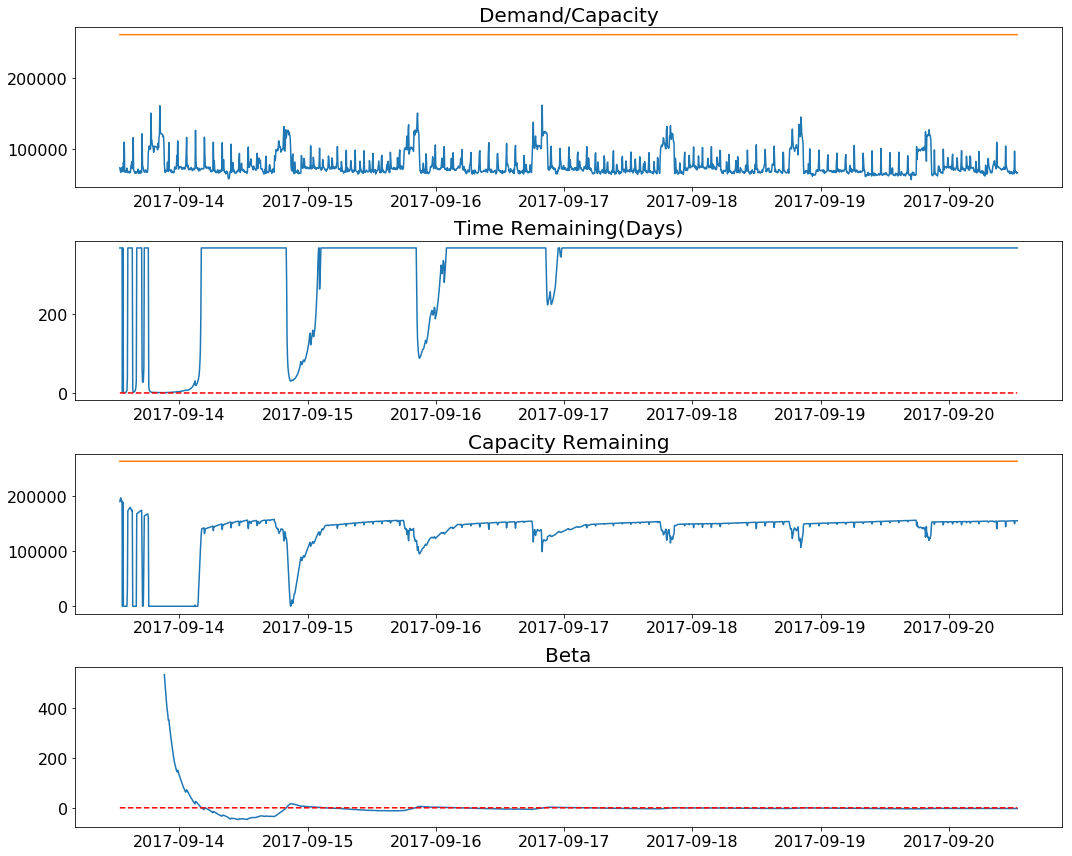

----------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------
https://bugzilla.eng.vmware.com/show_bug.cgi?id=1963944


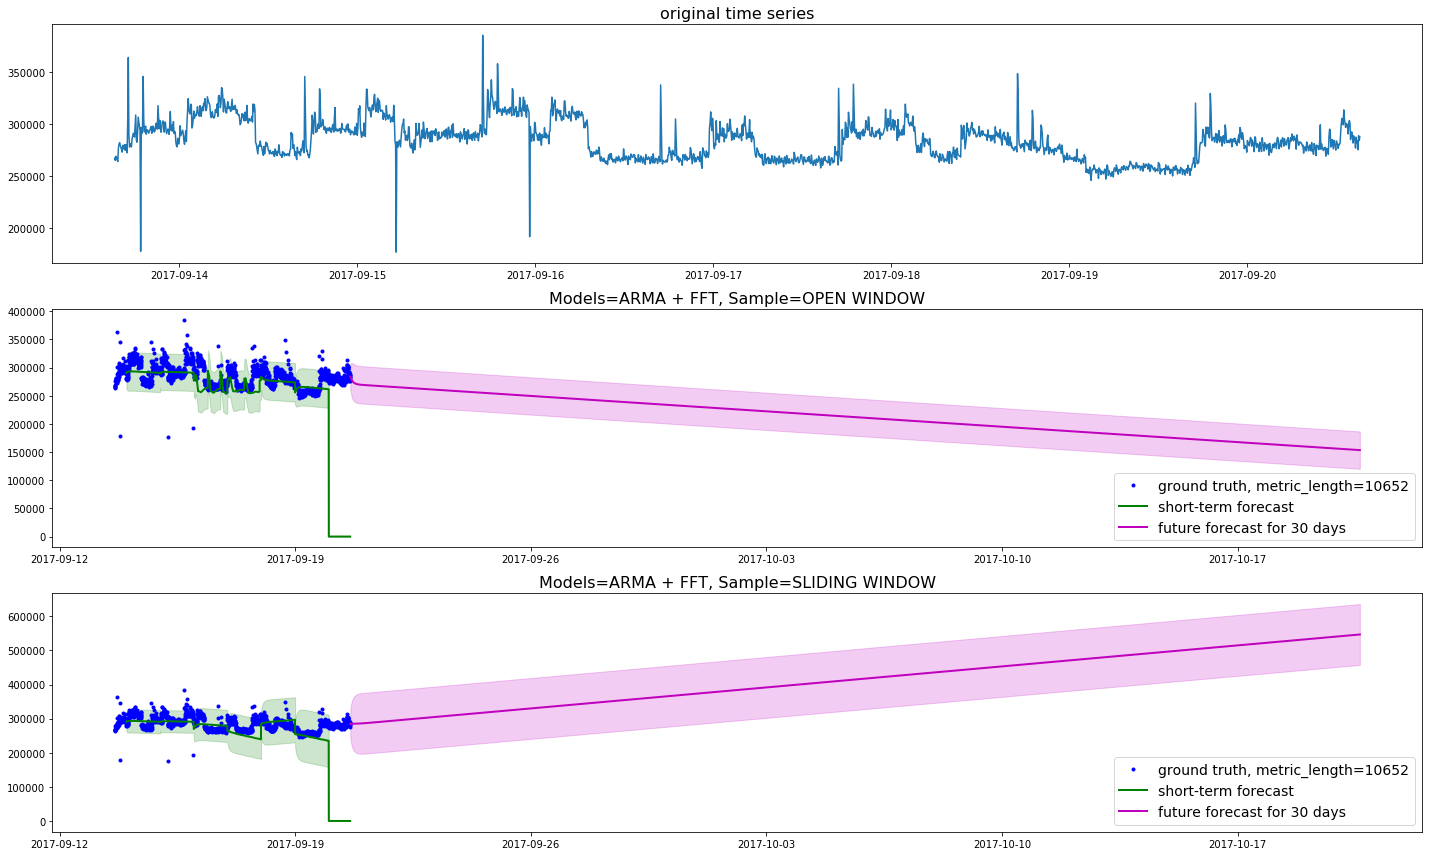

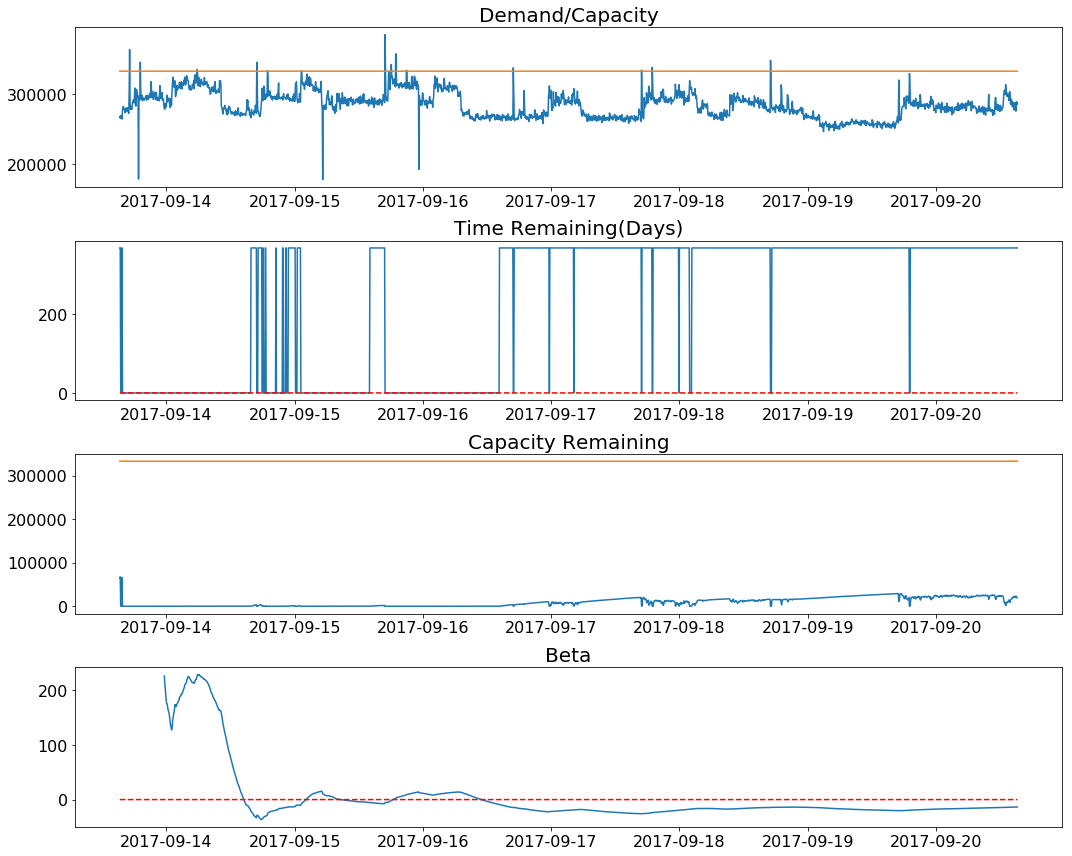

In [5]:
mpl.rcParams['figure.max_open_warning'] = 100
bugIds = ["1945221", "1950721", "1951911", "1953300", "1954261", "1954982", "1955035",
          "1957236", "1962140", "1962186", "1962233", "1963061", "1963086", "1963167",
          "1963182", "1963848", "1963860", "1963944"]

for budId in bugIds:
    forecast_csv = "TRBugs/forecast/bug_{}_demand.csv".format(budId)
    cr_tr_csv = "TRBugs/cr_tr/bug_{}_cr_tr_results.csv".format(budId)
    print("----------------------------------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------------------------------")
    print("https://bugzilla.eng.vmware.com/show_bug.cgi?id={}".format(budId))
    plot_forecast(forecast_csv)
    plot_CR_TR(cr_tr_csv)